# COMPLAINT ANALYSIS PROJECT

Sangita khade (M.Sc Statistics)

 

# Project  Description:
complaint Analysis : "Analyzing Complaints based on Complaint Types and
Regions.

1. Cleaning and Preprocessing the Complaint Types Data.
2. To calculate Resolution Time for each Complaints and checking which Agency
   resolve most complaints.
3. To check City, Location and Month wise Complaint Types.
4. Hypothesis testing (Chi Square test,wilcoxon sign test).
5. PCA
6. Implementation of ML algorithm for classification of Complaint Types according to Resolution Time (KNN, Random Forest Classifier) & prediction( linear Regression).

7. Time series analysis on Complaints and forecasting next 1week ,1 month, Complaints.(Decomposition, Stationarity, Moving Average ,Holt Winters Method, SARIMAX Model).

7. Evaluation of the models.

# Aim 

Complaint Analysis for Better Management Of Work Force Based On types of Complaints and time resolve the Cpmplaints so we can Organized the man power in the best ways in service industries or goverment like in Municipal Corporation

Firstly we have imported all the Libraries and packages we'll require for this project.
    

In [13]:
import pandas as pd                                                             # all packages and libraries which are required
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics

We are importing our data to be analysed.

In [3]:
file="C:\\Users\\SMART\\Downloads\\Complaint_Analysis.csv"                                                          #Load Data
df=pd.read_csv(file,sep=',', error_bad_lines=False, index_col='Unique Key', dtype='unicode')
df.head()

Created Date    Closed Date Agency  \
Unique Key                                           
32310363    12/31/2015 23:59  1/1/2016 0:55   NYPD   
32309934    12/31/2015 23:59  1/1/2016 1:26   NYPD   
32309159    12/31/2015 23:59  1/1/2016 4:51   NYPD   
32305098    12/31/2015 23:57  1/1/2016 7:43   NYPD   
32306529    12/31/2015 23:56  1/1/2016 3:24   NYPD   

                                Agency Name           Complaint Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   
32309159    New York City Police Department         Blocked Driveway   
32305098    New York City Police Department          Illegal Parking   
32306529    New York City Police Department          Illegal Parking   

                              Descriptor    Location Type Incident Zip  \
Unique Key                                                               
32310363                Loud Music/Party  Street/Sidewalk        10034   
32309934                       No Access  Street/Sidewalk        11105   
32309159                       No Access  Street/Sidewalk        10458   
32305098    Commercial Overnight Parking  Street/Sidewalk        10461   
32306529                Blocked Sidewalk  Street/Sidewalk        11373   

                 Incident Address       Street Name  ... Bridge Highway Name  \
Unique Key                                           ...                       
32310363      71 VERMILYEA AVENUE  VERMILYEA AVENUE  ...                 NaN   
32309934          27-07 23 AVENUE         23 AVENUE  ...                 NaN   
32309159    2897 VALENTINE AVENUE  VALENTINE AVENUE  ...                 NaN   
32305098      2940 BAISLEY AVENUE    BAISLEY AVENUE  ...                 NaN   
32306529            87-14 57 ROAD           57 ROAD  ...                 NaN   

           Bridge Highway Direction Road Ramp Bridge Highway Segment  \
Unique Key                                                             
32310363                        NaN       NaN                    NaN   
32309934                        NaN       NaN                    NaN   
32309159                        NaN       NaN                    NaN   
32305098                        NaN       NaN                    NaN   
32306529                        NaN       NaN                    NaN   

           Garage Lot Name Ferry Direction Ferry Terminal Name     Latitude  \
Unique Key                                                                    
32310363               NaN             NaN                 NaN  40.86568154   
32309934               NaN             NaN                 NaN  40.77594531   
32309159               NaN             NaN                 NaN  40.87032452   
32305098               NaN             NaN                 NaN  40.83599405   
32306529               NaN             NaN                 NaN  40.73305962   

               Longitude                                  Location  
Unique Key                                                          
32310363    -73.92350096   (40.86568153633767, -73.92350095571744)  
32309934    -73.91509394  (40.775945312321085, -73.91509393898605)  
32309159    -73.88852464  (40.870324522111424, -73.88852464418646)  
32305098     -73.8283794   (40.83599404683083, -73.82837939584206)  
32306529    -73.87416976  (40.733059618956815, -73.87416975810375)  

[5 rows x 52 columns]

We are using shape function for checking attributes and features of data.

In [4]:
df.shape                                                        

(364558, 52)

our data has 364558 attributes(rows) and 52 features(columns) 
Now we'll look for the names of the columns of the dataset using pd.columns

In [5]:
df.columns                                                                                                    # checking columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
  

changing  colunms name by replacing space by _(underscore)

In [6]:
df.columns=df.columns.str.replace(' ','_')                                         
df.columns

Index(['Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_Direction',
  

In [7]:
df.head()

Created_Date    Closed_Date Agency  \
Unique Key                                           
32310363    12/31/2015 23:59  1/1/2016 0:55   NYPD   
32309934    12/31/2015 23:59  1/1/2016 1:26   NYPD   
32309159    12/31/2015 23:59  1/1/2016 4:51   NYPD   
32305098    12/31/2015 23:57  1/1/2016 7:43   NYPD   
32306529    12/31/2015 23:56  1/1/2016 3:24   NYPD   

                                Agency_Name           Complaint_Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   
32309159    New York City Police Department         Blocked Driveway   
32305098    New York City Police Department          Illegal Parking   
32306529    New York City Police Department          Illegal Parking   

                              Descriptor    Location_Type Incident_Zip  \
Unique Key                                                               
32310363                Loud Music/Party  Street/Sidewalk        10034   
32309934                       No Access  Street/Sidewalk        11105   
32309159                       No Access  Street/Sidewalk        10458   
32305098    Commercial Overnight Parking  Street/Sidewalk        10461   
32306529                Blocked Sidewalk  Street/Sidewalk        11373   

                 Incident_Address       Street_Name  ... Bridge_Highway_Name  \
Unique Key                                           ...                       
32310363      71 VERMILYEA AVENUE  VERMILYEA AVENUE  ...                 NaN   
32309934          27-07 23 AVENUE         23 AVENUE  ...                 NaN   
32309159    2897 VALENTINE AVENUE  VALENTINE AVENUE  ...                 NaN   
32305098      2940 BAISLEY AVENUE    BAISLEY AVENUE  ...                 NaN   
32306529            87-14 57 ROAD           57 ROAD  ...                 NaN   

           Bridge_Highway_Direction Road_Ramp Bridge_Highway_Segment  \
Unique Key                                                             
32310363                        NaN       NaN                    NaN   
32309934                        NaN       NaN                    NaN   
32309159                        NaN       NaN                    NaN   
32305098                        NaN       NaN                    NaN   
32306529                        NaN       NaN                    NaN   

           Garage_Lot_Name Ferry_Direction Ferry_Terminal_Name     Latitude  \
Unique Key                                                                    
32310363               NaN             NaN                 NaN  40.86568154   
32309934               NaN             NaN                 NaN  40.77594531   
32309159               NaN             NaN                 NaN  40.87032452   
32305098               NaN             NaN                 NaN  40.83599405   
32306529               NaN             NaN                 NaN  40.73305962   

               Longitude                                  Location  
Unique Key                                                          
32310363    -73.92350096   (40.86568153633767, -73.92350095571744)  
32309934    -73.91509394  (40.775945312321085, -73.91509393898605)  
32309159    -73.88852464  (40.870324522111424, -73.88852464418646)  
32305098     -73.8283794   (40.83599404683083, -73.82837939584206)  
32306529    -73.87416976  (40.733059618956815, -73.87416975810375)  

[5 rows x 52 columns]

displaying all columns

In [8]:
pd.set_option('display.max_columns',100)                                                                 
df.head()

Created_Date    Closed_Date Agency  \
Unique Key                                           
32310363    12/31/2015 23:59  1/1/2016 0:55   NYPD   
32309934    12/31/2015 23:59  1/1/2016 1:26   NYPD   
32309159    12/31/2015 23:59  1/1/2016 4:51   NYPD   
32305098    12/31/2015 23:57  1/1/2016 7:43   NYPD   
32306529    12/31/2015 23:56  1/1/2016 3:24   NYPD   

                                Agency_Name           Complaint_Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   
32309159    New York City Police Department         Blocked Driveway   
32305098    New York City Police Department          Illegal Parking   
32306529    New York City Police Department          Illegal Parking   

                              Descriptor    Location_Type Incident_Zip  \
Unique Key                                                               
32310363                Loud Music/Party  Street/Sidewalk        10034   
32309934                       No Access  Street/Sidewalk        11105   
32309159                       No Access  Street/Sidewalk        10458   
32305098    Commercial Overnight Parking  Street/Sidewalk        10461   
32306529                Blocked Sidewalk  Street/Sidewalk        11373   

                 Incident_Address       Street_Name   Cross_Street_1  \
Unique Key                                                             
32310363      71 VERMILYEA AVENUE  VERMILYEA AVENUE   ACADEMY STREET   
32309934          27-07 23 AVENUE         23 AVENUE        27 STREET   
32309159    2897 VALENTINE AVENUE  VALENTINE AVENUE  EAST 198 STREET   
32305098      2940 BAISLEY AVENUE    BAISLEY AVENUE    EDISON AVENUE   
32306529            87-14 57 ROAD           57 ROAD   SEABURY STREET   

             Cross_Street_2 Intersection_Street_1 Intersection_Street_2  \
Unique Key                                                                
32310363    WEST 204 STREET                   NaN                   NaN   
32309934          28 STREET                   NaN                   NaN   
32309159    EAST 199 STREET                   NaN                   NaN   
32305098           B STREET                   NaN                   NaN   
32306529      HOFFMAN DRIVE                   NaN                   NaN   

           Address_Type      City Landmark Facility_Type  Status  \
Unique Key                                                         
32310363        ADDRESS  NEW YORK      NaN      Precinct  Closed   
32309934        ADDRESS   ASTORIA      NaN      Precinct  Closed   
32309159        ADDRESS     BRONX      NaN      Precinct  Closed   
32305098        ADDRESS     BRONX      NaN      Precinct  Closed   
32306529        ADDRESS  ELMHURST      NaN      Precinct  Closed   

                 Due_Date                             Resolution_Description  \
Unique Key                                                                     
32310363    1/1/2016 7:59  The Police Department responded and upon arriv...   
32309934    1/1/2016 7:59  The Police Department responded to the complai...   
32309159    1/1/2016 7:59  The Police Department responded and upon arriv...   
32305098    1/1/2016 7:57  The Police Department responded to the complai...   
32306529    1/1/2016 7:56  The Police Department responded and upon arriv...   

           Resolution_Action_Updated_Date Community_Board    Borough  \
Unique Key                                                             
32310363                    1/1/2016 0:55    12 MANHATTAN  MANHATTAN   
32309934                    1/1/2016 1:26       01 QUEENS     QUEENS   
32309159                    1/1/2016 4:51        07 BRONX      BRONX   
32305098                    1/1/2016 7:43        10 BRONX      BRONX   
32306529                    1/1/2016 3:24       04 QUEENS     QUEENS   

           X_Coordinate_(State_Plane) Y

In [9]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364558 entries, 32310363 to 29611816
Data columns (total 52 columns):
Created_Date                      364558 non-null object
Closed_Date                       362177 non-null object
Agency                            364558 non-null object
Agency_Name                       364558 non-null object
Complaint_Type                    364558 non-null object
Descriptor                        358057 non-null object
Location_Type                     364425 non-null object
Incident_Zip                      361560 non-null object
Incident_Address                  312859 non-null object
Street_Name                       312859 non-null object
Cross_Street_1                    307370 non-null object
Cross_Street_2                    306753 non-null object
Intersection_Street_1             51120 non-null object
Intersection_Street_2             50512 non-null object
Address_Type                      361306 non-null object
City                       

Checking null values in the data set

In [10]:
df.isnull().sum()                                                                                # checking null values in data

Created_Date                           0
Closed_Date                         2381
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                          6501
Location_Type                        133
Incident_Zip                        2998
Incident_Address                   51699
Street_Name                        51699
Cross_Street_1                     57188
Cross_Street_2                     57805
Intersection_Street_1             313438
Intersection_Street_2             314046
Address_Type                        3252
City                                2997
Landmark                          364183
Facility_Type                       2389
Status                                 0
Due_Date                               3
Resolution_Description                 0
Resolution_Action_Updated_Date      2402
Community_Board                        0
Borough                                0
X_Coordinate_(St

as we can see above our dataset has some columns with more than 3lakh missing values and some columns are having observations as"unspecified" so we are dropping those columns and will not be using them for further analysis.

In [11]:
df.drop(['Intersection_Street_1','Intersection_Street_2','Landmark','School_or_Citywide_Complaint','Vehicle_Type','Taxi_Company_Borough','Taxi_Pick_Up_Location','Bridge_Highway_Name','Bridge_Highway_Direction','Road_Ramp','Bridge_Highway_Segment','Garage_Lot_Name','Ferry_Direction','Ferry_Terminal_Name','Agency','Park_Facility_Name','School_Name', 'School_Number', 'School_Region','Facility_Type', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found'],inplace=True,axis=1)
df.head()
        

Created_Date    Closed_Date                      Agency_Name  \
Unique Key                                                                     
32310363    12/31/2015 23:59  1/1/2016 0:55  New York City Police Department   
32309934    12/31/2015 23:59  1/1/2016 1:26  New York City Police Department   
32309159    12/31/2015 23:59  1/1/2016 4:51  New York City Police Department   
32305098    12/31/2015 23:57  1/1/2016 7:43  New York City Police Department   
32306529    12/31/2015 23:56  1/1/2016 3:24  New York City Police Department   

                     Complaint_Type                    Descriptor  \
Unique Key                                                          
32310363    Noise - Street/Sidewalk              Loud Music/Party   
32309934           Blocked Driveway                     No Access   
32309159           Blocked Driveway                     No Access   
32305098            Illegal Parking  Commercial Overnight Parking   
32306529            Illegal Parking              Blocked Sidewalk   

              Location_Type Incident_Zip       Incident_Address  \
Unique Key                                                        
32310363    Street/Sidewalk        10034    71 VERMILYEA AVENUE   
32309934    Street/Sidewalk        11105        27-07 23 AVENUE   
32309159    Street/Sidewalk        10458  2897 VALENTINE AVENUE   
32305098    Street/Sidewalk        10461    2940 BAISLEY AVENUE   
32306529    Street/Sidewalk        11373          87-14 57 ROAD   

                 Street_Name   Cross_Street_1   Cross_Street_2 Address_Type  \
Unique Key                                                                    
32310363    VERMILYEA AVENUE   ACADEMY STREET  WEST 204 STREET      ADDRESS   
32309934           23 AVENUE        27 STREET        28 STREET      ADDRESS   
32309159    VALENTINE AVENUE  EAST 198 STREET  EAST 199 STREET      ADDRESS   
32305098      BAISLEY AVENUE    EDISON AVENUE         B STREET      ADDRESS   
32306529             57 ROAD   SEABURY STREET    HOFFMAN DRIVE      ADDRESS   

                City  Status       Due_Date  \
Unique Key                                    
32310363    NEW YORK  Closed  1/1/2016 7:59   
32309934     ASTORIA  Closed  1/1/2016 7:59   
32309159       BRONX  Closed  1/1/2016 7:59   
32305098       BRONX  Closed  1/1/2016 7:57   
32306529    ELMHURST  Closed  1/1/2016 7:56   

                                       Resolution_Description  \
Unique Key                                                      
32310363    The Police Department responded and upon arriv...   
32309934    The Police Department responded to the complai...   
32309159    The Police Department responded and upon arriv...   
32305098    The Police Department responded to the complai...   
32306529    The Police Department responded and upon arriv...   

           Resolution_Action_Updated_Date Community_Board    Borough  \
Unique Key                                                             
32310363                    1/1/2016 0:55    12 MANHATTAN  MANHATTAN   
32309934                    1/1/2016 1:26       01 QUEENS     QUEENS   
32309159                    1/1/2016 4:51        07 BRONX      BRONX   
32305098                    1/1/2016 7:43        10 BRONX      BRONX   
32306529                    1/1/2016 3:24       04 QUEENS     QUEENS   

           X_Coordinate_(State_Plane) Y_Coordinate_(State_Plane) Park_Borough  \
Unique Key                                                                      
32310363                      1005409                     254678    MANHATTAN   
32309934                      1007766                     221986       QUEENS   
32309159                      1015081                     256380        BRONX   
32305098                      1031740                     243899        BRONX   
32306529                      1019123                     206375       QUEENS   

               Latitude     Longitude  \
Unique Key                              
323103

Now will again check shape of our dataset and will also look for unique values in each data set

In [12]:
df.shape                                                                              # Now we have total 38 columns or features

(364558, 25)

In [13]:
for i in df:                                                                            # checking unique values in each columns
    print(i,'......',df[i].nunique())

Created_Date ...... 246671
Closed_Date ...... 210857
Agency_Name ...... 3
Complaint_Type ...... 24
Descriptor ...... 45
Location_Type ...... 18
Incident_Zip ...... 201
Incident_Address ...... 126372
Street_Name ...... 7693
Cross_Street_1 ...... 6234
Cross_Street_2 ...... 6064
Address_Type ...... 5
City ...... 53
Status ...... 4
Due_Date ...... 246654
Resolution_Description ...... 18
Resolution_Action_Updated_Date ...... 211259
Community_Board ...... 75
Borough ...... 6
X_Coordinate_(State_Plane) ...... 68410
Y_Coordinate_(State_Plane) ...... 79924
Park_Borough ...... 6
Latitude ...... 145613
Longitude ...... 145701
Location ...... 146751


# Descriptive Analysis

# feequency distribution of complaints types

here we are checking counts of the complaints along with its type.

In [14]:
complaints=df["Complaint_Type"].value_counts()      #frequencies of each complaint type
complaints

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint_Type, dtype: int64

Here we've plotted frequence distribution of complaint types

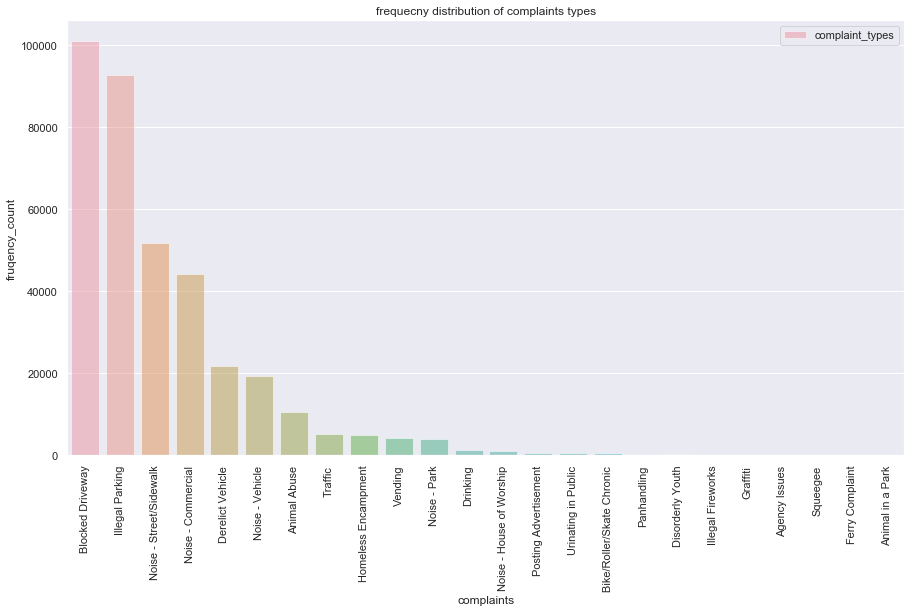

In [15]:
sns.set(style="darkgrid")                                    
fig=plt.figure(figsize=(15,8))
sns.barplot(complaints.index,complaints.values,label='complaint_types',alpha=0.5)
plt.xticks(rotation="vertical")
plt.xlabel('complaints')
plt.ylabel('fruqency_count')
plt.legend()
plt.title("frequecny distribution of complaints types")
plt.show()

Checking top 10 complaints from the dataset and visualizing them.

In [16]:
top_10_complaints=complaints.head(10)
top_10_complaints                                  

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint_Type, dtype: int64

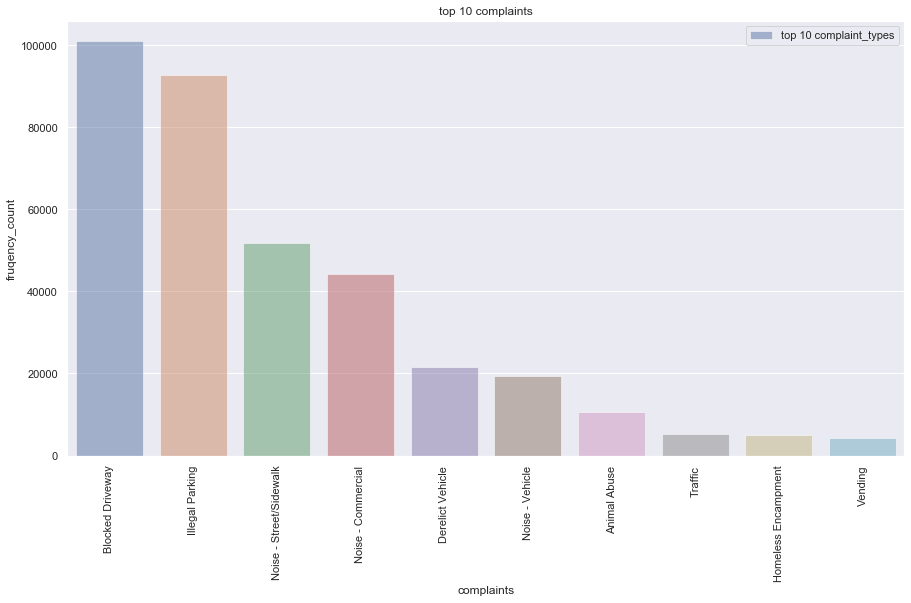

In [17]:
sns.set(style="darkgrid")                                     #visualization of top 10 complaint types
fig=plt.figure(figsize=(15,8))
sns.barplot(top_10_complaints.index,top_10_complaints.values,label='top 10 complaint_types',alpha=0.5)
plt.xticks(rotation="vertical")
plt.xlabel('complaints')
plt.ylabel('fruqency_count')
plt.legend()
plt.title('top 10 complaints')
plt.show()

From above graph we can conclude that Blocked Driveway and Illegal Parking are the most frequent complaints filed by peoples.

# visualize city and location wise complaints type

here we've calculated the complaint type according to the City and Location type also plotted a graph for better understanding.

In [18]:
city_location_type=df.groupby(['City','Location_Type']).count()[['Complaint_Type']]
city_location_type

Complaint_Type
City       Location_Type                             
ARVERNE    Club/Bar/Restaurant                      1
           House of Worship                        14
           Park/Playground                          2
           Residential Building                     1
           Residential Building/House              42
           Store/Commercial                         3
           Street/Sidewalk                        196
ASTORIA    Club/Bar/Restaurant                   1433
           Highway                                  2
           House and Store                          3
           House of Worship                        21
           Park/Playground                         75
           Parking Lot                              2
           Residential Building                     3
           Residential Building/House             144
           Roadway Tunnel                           1
           Store/Commercial                       278
           Street/Sidewalk                       6026
           Vacant Lot                               3
Astoria    Store/Commercial                       311
           Street/Sidewalk                        594
           Vacant Lot                               1
BAYSIDE    Club/Bar/Restaurant                     31
           Highway                                  2
           House and Store                          1
           House of Worship                         3
           Park/Playground                          4
           Parking Lot                              3
           Residential Building                     4
           Residential Building/House              35
...                                               ...
SUNNYSIDE  Subway Station                           1
WHITESTONE Club/Bar/Restaurant                      7
           Highway                                  8
           House and Store                          4
           Park/Playground                          7
           Parking Lot                              1
           Residential Building                     2
           Residential Building/House              34
           Store/Commercial                        15
           Street/Sidewalk                       1291
WOODHAVEN  Club/Bar/Restaurant                     82
           House and Store                          3
           House of Worship                         3
           Park/Playground                          6
           Residential Building                     5
           Residential Building/House              49
           Store/Commercial                       131
           Street/Sidewalk                       2822
WOODSIDE   Club/Bar/Restaurant                    147
           Commercial                              14
           Highway                                  4
           House of Worship                         4
           Park/Playground                         59
           Parking Lot                              9
           Residential Building/House              64
           Store/Commercial                       142
           Street/Sidewalk                       3910
           Vacant Lot                               1
Woodside   Store/Commercial                         2
           Street/Sidewalk                        164

[445 rows x 1 columns]

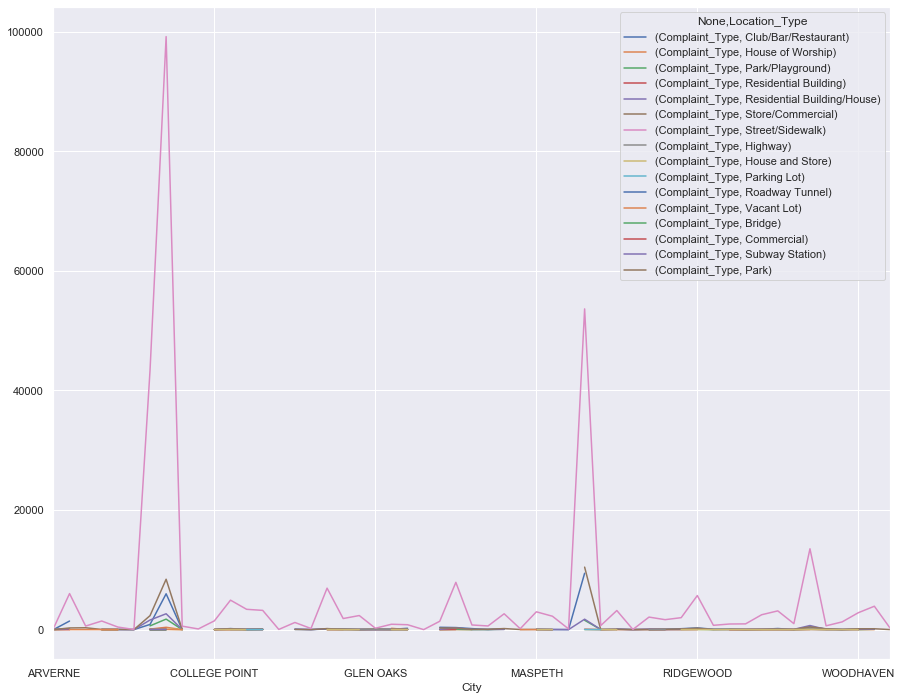

In [19]:
fig,ax=plt.subplots(figsize=(15,12))
city_location_type.unstack().plot(ax=ax)

here we can see at the  street/sidewalk,club/bar/restaurant of college point, mashpeth has maximum complaints 

# month wise complaint types

Now we are calculating Complaints in each month and for that converted date into Month using datetimeIndex package.

In [20]:
df["month"]=pd.DatetimeIndex(df["Created_Date"]).month    # converting created_date varible into only months
df["month"]

Unique Key
32310363    12
32309934    12
32309159    12
32305098    12
32306529    12
32306554    12
32306559    12
32307009    12
32308581    12
32308391    12
32305071    12
32306260    12
32306612    12
32305074    12
32309424    12
32309853    12
32305538    12
32310273    12
32306617    12
32308195    12
32310127    12
32307994    12
32307233    12
32308765    12
32308423    12
32308426    12
32305916    12
32308379    12
32309402    12
32308850    12
            ..
29611177     1
29610911     1
29613202     1
29613395     1
29610186     1
29610180     1
29612845     1
29611005     1
29607433     1
29613469     1
29609131     1
29608505     1
29607742     1
29612697     1
29607990     1
29609631     1
29613295     1
29613456     1
29613402     1
29608295     1
29613386     1
29610965     1
29610950     1
29607567     1
29610051     1
29609918     1
29608392     1
29607589     1
29610889     1
29611816     1
Name: month, Length: 364558, dtype: int64

Here we have calculated complaints in each month

In [21]:
month_complaints=df.groupby(['month']).count()[['Complaint_Type']]
month_complaints

Complaint_Type
month                
1               20150
2               20719
3               25462
4               27305
5               36437
6               35315
7               34888
8               34956
9               35427
10              32605
11              30773
12              30521

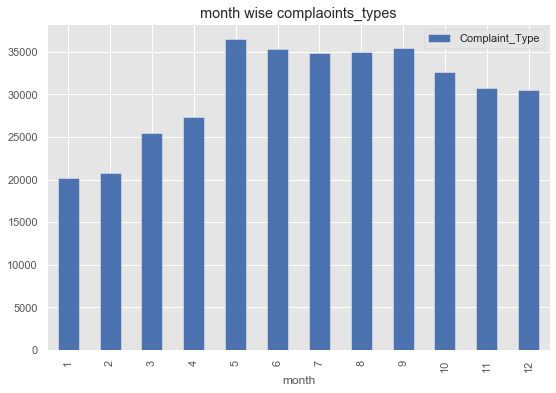

In [22]:
style.use("ggplot")
ax=month_complaints.plot(kind='bar',figsize=(9,6),color='b')
ax.set_title("month wise complaoints_types")
plt.show()

# To check which agency resolve most complaint graphically

In our dataset we've 3 agencies, so to find which agency resolved most of the complaints we have taken following steps.

In [23]:
agency_wise=df.groupby(['Agency_Name']).count()[["Complaint_Type"]]
agency_wise

Complaint_Type
Agency_Name                                    
Internal Affairs Bureau                       8
NYPD                                          2
New York City Police Department          364548

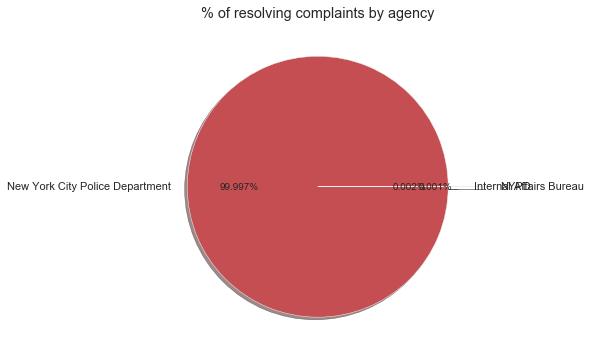

In [24]:
fig=plt.figure(figsize=(9,6))
plt.pie(agency_wise['Complaint_Type'],colors=['c','b','r'],labels=['Internal Affairs Bureau ','NYPD','New York City Police Department '],
       startangle=0,
        shadow= True,
        explode=(0.1,0.3,0),
        autopct='%1.3f%%')
plt.title('% of resolving complaints by agency')
plt.show()

So, as we can see New York City Police Department has solved near about 99.97% of complaints, Internal Affairs Bureau has resolved 0.001 % complaints where as NYPD has resolved only 2 complaints.
Hence we can conclude here that New York City Police Department is doing a great job.

# converting into date format

here we are converting columns having date into datetime as those columns were objects previously.

In [25]:
df['Created_Date']=pd.to_datetime(df.Created_Date)
df['Closed_Date']=pd.to_datetime(df.Closed_Date)
df['Due_Date']=pd.to_datetime(df.Due_Date)
df['Resolution_Action_Updated_Date']=pd.to_datetime(df.Resolution_Action_Updated_Date)

Created 2 new variables namely "Call_closing_time" & "Resolution_time" for further analysis.

In [26]:
df['Call_closing_time']=(df['Closed_Date']-df['Created_Date'])
df['Resolution_time']=(df['Resolution_Action_Updated_Date']-df['Created_Date'])   # creating two new varibles call_closing_time and resolution_time

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364558 entries, 32310363 to 29611816
Data columns (total 28 columns):
Created_Date                      364558 non-null datetime64[ns]
Closed_Date                       362177 non-null datetime64[ns]
Agency_Name                       364558 non-null object
Complaint_Type                    364558 non-null object
Descriptor                        358057 non-null object
Location_Type                     364425 non-null object
Incident_Zip                      361560 non-null object
Incident_Address                  312859 non-null object
Street_Name                       312859 non-null object
Cross_Street_1                    307370 non-null object
Cross_Street_2                    306753 non-null object
Address_Type                      361306 non-null object
City                              361561 non-null object
Status                            364558 non-null object
Due_Date                          364555 non-null datetime64[ns]
R

In [28]:
#creating new columns into Hours 
df['Call_closing_time']=(df['Closed_Date']-df['Created_Date']).dt.seconds/3600
df['Resolution_time']=(df['Resolution_Action_Updated_Date']-df['Created_Date']).dt.seconds/3600

In [29]:
df['Call_closing_time'].sum()

1398089.7500000002

In [30]:
df['Resolution_time'].sum()

1397636.1499999994

In [31]:
df.head()

Created_Date         Closed_Date  \
Unique Key                                           
32310363   2015-12-31 23:59:00 2016-01-01 00:55:00   
32309934   2015-12-31 23:59:00 2016-01-01 01:26:00   
32309159   2015-12-31 23:59:00 2016-01-01 04:51:00   
32305098   2015-12-31 23:57:00 2016-01-01 07:43:00   
32306529   2015-12-31 23:56:00 2016-01-01 03:24:00   

                                Agency_Name           Complaint_Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   
32309159    New York City Police Department         Blocked Driveway   
32305098    New York City Police Department          Illegal Parking   
32306529    New York City Police Department          Illegal Parking   

                              Descriptor    Location_Type Incident_Zip  \
Unique Key                                                               
32310363                Loud Music/Party  Street/Sidewalk        10034   
32309934                       No Access  Street/Sidewalk        11105   
32309159                       No Access  Street/Sidewalk        10458   
32305098    Commercial Overnight Parking  Street/Sidewalk        10461   
32306529                Blocked Sidewalk  Street/Sidewalk        11373   

                 Incident_Address       Street_Name   Cross_Street_1  \
Unique Key                                                             
32310363      71 VERMILYEA AVENUE  VERMILYEA AVENUE   ACADEMY STREET   
32309934          27-07 23 AVENUE         23 AVENUE        27 STREET   
32309159    2897 VALENTINE AVENUE  VALENTINE AVENUE  EAST 198 STREET   
32305098      2940 BAISLEY AVENUE    BAISLEY AVENUE    EDISON AVENUE   
32306529            87-14 57 ROAD           57 ROAD   SEABURY STREET   

             Cross_Street_2 Address_Type      City  Status  \
Unique Key                                                   
32310363    WEST 204 STREET      ADDRESS  NEW YORK  Closed   
32309934          28 STREET      ADDRESS   ASTORIA  Closed   
32309159    EAST 199 STREET      ADDRESS     BRONX  Closed   
32305098           B STREET      ADDRESS     BRONX  Closed   
32306529      HOFFMAN DRIVE      ADDRESS  ELMHURST  Closed   

                      Due_Date  \
Unique Key                       
32310363   2016-01-01 07:59:00   
32309934   2016-01-01 07:59:00   
32309159   2016-01-01 07:59:00   
32305098   2016-01-01 07:57:00   
32306529   2016-01-01 07:56:00   

                                       Resolution_Description  \
Unique Key                                                      
32310363    The Police Department responded and upon arriv...   
32309934    The Police Department responded to the complai...   
32309159    The Police Department responded and upon arriv...   
32305098    The Police Department responded to the complai...   
32306529    The Police Department responded and upon arriv...   

           Resolution_Action_Updated_Date Community_Board    Borough  \
Unique Key                                                             
32310363              2016-01-01 00:55:00    12 MANHATTAN  MANHATTAN   
32309934              2016-01-01 01:26:00       01 QUEENS     QUEENS   
32309159              2016-01-01 04:51:00        07 BRONX      BRONX   
32305098              2016-01-01 07:43:00        10 BRONX      BRONX   
32306529              2016-01-01 03:24:00       04 QUEENS     QUEENS   

           X_Coordinate_(State_Plane) Y_Coordinate_(State_Plane) Park_Borough  \
Unique Key                                                                      
32310363                      1005409                     254678    MANHATTAN   
32309934                      1007766                     221986       QUEENS   
32309159                      1015081                     256380        BRONX   
32305098                      1031740                     243899      

In [32]:
df.dtypes

Created_Date                      datetime64[ns]
Closed_Date                       datetime64[ns]
Agency_Name                               object
Complaint_Type                            object
Descriptor                                object
Location_Type                             object
Incident_Zip                              object
Incident_Address                          object
Street_Name                               object
Cross_Street_1                            object
Cross_Street_2                            object
Address_Type                              object
City                                      object
Status                                    object
Due_Date                          datetime64[ns]
Resolution_Description                    object
Resolution_Action_Updated_Date    datetime64[ns]
Community_Board                           object
Borough                                   object
X_Coordinate_(State_Plane)                object
Y_Coordinate_(State_

#  Mean Resolution time for each complaint

We're calculating mean resolution time so that we can find which complaint type is taking more time to resolve.

In [33]:
mean_resolution_time=df.groupby(["Complaint_Type"]).mean()[["Resolution_time"]]     # mean resolution time for each complaint type
mean_resolution_time  

Resolution_time
Complaint_Type                            
Agency Issues                     5.066667
Animal Abuse                      4.515323
Animal in a Park                  0.850000
Bike/Roller/Skate Chronic         3.441860
Blocked Driveway                  4.224519
Derelict Vehicle                  5.476844
Disorderly Youth                  3.357513
Drinking                          3.598789
Ferry Complaint                   2.683333
Graffiti                          5.394692
Homeless Encampment               4.037438
Illegal Fireworks                 2.669961
Illegal Parking                   4.034639
Noise - Commercial                2.936305
Noise - House of Worship          2.961782
Noise - Park                      3.246523
Noise - Street/Sidewalk           3.183185
Noise - Vehicle                   3.298431
Panhandling                       3.812205
Posting Advertisement             1.984612
Squeegee                          4.045833
Traffic                           3.155648
Urinating in Public               3.412533
Vending                           3.790025

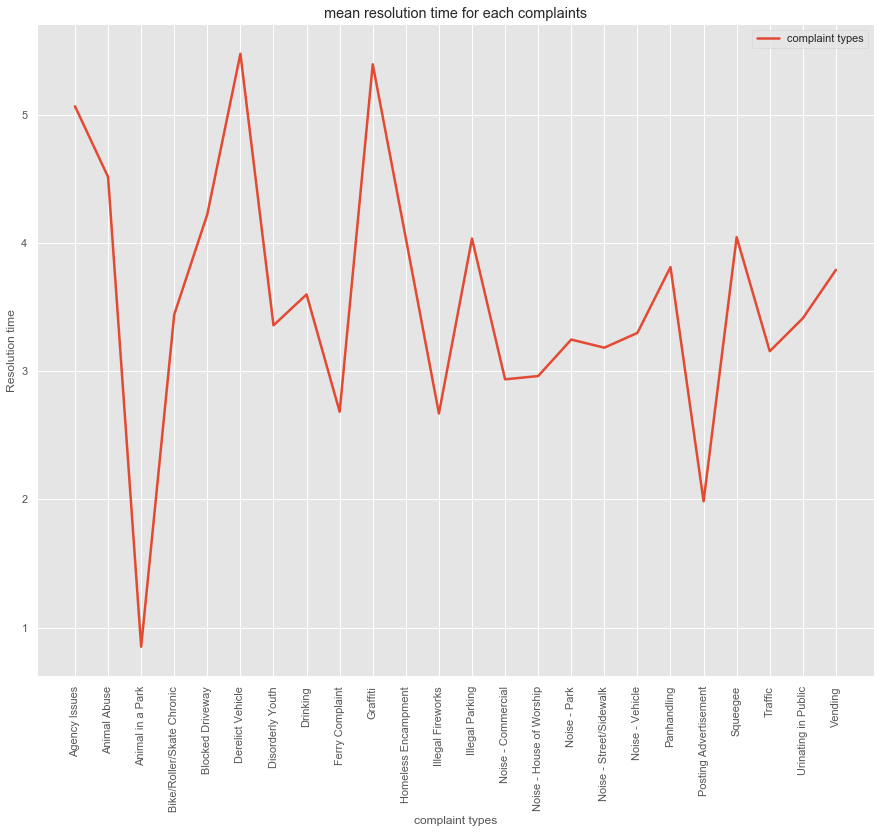

In [34]:
style.use("ggplot")           #visualization through graph
fig=plt.figure(figsize=(15,12))
plt.plot(mean_resolution_time,linewidth=2.5,label="complaint types")
plt.xticks(rotation='vertical')
plt.ylabel("Resolution time")
plt.xlabel("complaint types")
plt.legend()
plt.title("mean resolution time for each complaints")
plt.show()

The complaint types-Agency Issues,Derelict Vehicle,Graffiti takes maximum time to resolve.

# work for missing values

In [36]:
df.drop(["Created_Date","Closed_Date","Resolution_Action_Updated_Date",'Due_Date','Location'],inplace=True,axis=1)

In [37]:
df.head()

Agency_Name           Complaint_Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   
32309159    New York City Police Department         Blocked Driveway   
32305098    New York City Police Department          Illegal Parking   
32306529    New York City Police Department          Illegal Parking   

                              Descriptor    Location_Type Incident_Zip  \
Unique Key                                                               
32310363                Loud Music/Party  Street/Sidewalk        10034   
32309934                       No Access  Street/Sidewalk        11105   
32309159                       No Access  Street/Sidewalk        10458   
32305098    Commercial Overnight Parking  Street/Sidewalk        10461   
32306529                Blocked Sidewalk  Street/Sidewalk        11373   

                 Incident_Address       Street_Name   Cross_Street_1  \
Unique Key                                                             
32310363      71 VERMILYEA AVENUE  VERMILYEA AVENUE   ACADEMY STREET   
32309934          27-07 23 AVENUE         23 AVENUE        27 STREET   
32309159    2897 VALENTINE AVENUE  VALENTINE AVENUE  EAST 198 STREET   
32305098      2940 BAISLEY AVENUE    BAISLEY AVENUE    EDISON AVENUE   
32306529            87-14 57 ROAD           57 ROAD   SEABURY STREET   

             Cross_Street_2 Address_Type      City  Status  \
Unique Key                                                   
32310363    WEST 204 STREET      ADDRESS  NEW YORK  Closed   
32309934          28 STREET      ADDRESS   ASTORIA  Closed   
32309159    EAST 199 STREET      ADDRESS     BRONX  Closed   
32305098           B STREET      ADDRESS     BRONX  Closed   
32306529      HOFFMAN DRIVE      ADDRESS  ELMHURST  Closed   

                                       Resolution_Description Community_Board  \
Unique Key                                                                      
32310363    The Police Department responded and upon arriv...    12 MANHATTAN   
32309934    The Police Department responded to the complai...       01 QUEENS   
32309159    The Police Department responded and upon arriv...        07 BRONX   
32305098    The Police Department responded to the complai...        10 BRONX   
32306529    The Police Department responded and upon arriv...       04 QUEENS   

              Borough X_Coordinate_(State_Plane) Y_Coordinate_(State_Plane)  \
Unique Key                                                                    
32310363    MANHATTAN                    1005409                     254678   
32309934       QUEENS                    1007766                     221986   
32309159        BRONX                    1015081                     256380   
32305098        BRONX                    1031740                     243899   
32306529       QUEENS                    1019123                     206375   

           Park_Borough     Latitude     Longitude  month  Call_closing_time  \
Unique Key                                                                     
32310363      MANHATTAN  40.86568154  -73.92350096     12           0.933333   
32309934         QUEENS  40.77594531  -73.91509394     12           1.450000   
32309159          BRONX  40.87032452  -73.88852464     12           4.866667   
32305098          BRONX  40.83599405   -73.8283794     12           7.766667   
32306529         QUEENS  40.73305962  -73.87416976     12           3.466667   

            Resolution_time  
Unique Key                   
32310363           0.933333  
32309934           1.450000  
32309159           4.866667  
32305098           7.766667  
32306529           3.466667

In [38]:
df.shape

(364558, 23)

In [39]:
df.isnull().sum()

Agency_Name                       0
Complaint_Type                    0
Descriptor                     6501
Location_Type                   133
Incident_Zip                   2998
Incident_Address              51699
Street_Name                   51699
Cross_Street_1                57188
Cross_Street_2                57805
Address_Type                   3252
City                           2997
Status                            0
Resolution_Description            0
Community_Board                   0
Borough                           0
X_Coordinate_(State_Plane)     4030
Y_Coordinate_(State_Plane)     4030
Park_Borough                      0
Latitude                       4030
Longitude                      4030
month                             0
Call_closing_time              2381
Resolution_time                2402
dtype: int64

Address_Type,City,Location_Type,Descriptor,Incident_Address,Cross_Street_1,Cross_Street_2,Street_Name these columns contains Categorial values so we are replacing those values with mode() of the column's values.

In [40]:
df["Address_Type"]=df["Address_Type"].fillna(df["Address_Type"].mode()[0])
df['City']=df['City'].fillna('Unknown')
df["Location_Type"]=df["Location_Type"].fillna(df["Location_Type"].mode()[0])
df['Descriptor']=df["Descriptor"].fillna("No Access")
df["Incident_Address"]=df["Incident_Address"].fillna(df["Incident_Address"].mode()[0])
df["Cross_Street_1"]=df["Cross_Street_1"].fillna(df["Cross_Street_1"].mode()[0])
df["Cross_Street_2"]=df["Cross_Street_2"].fillna(df["Cross_Street_2"].mode()[0])
df["Street_Name"]=df["Street_Name"].fillna(df["Street_Name"].mode()[0])

In [41]:
df.head()

Agency_Name           Complaint_Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   
32309159    New York City Police Department         Blocked Driveway   
32305098    New York City Police Department          Illegal Parking   
32306529    New York City Police Department          Illegal Parking   

                              Descriptor    Location_Type Incident_Zip  \
Unique Key                                                               
32310363                Loud Music/Party  Street/Sidewalk        10034   
32309934                       No Access  Street/Sidewalk        11105   
32309159                       No Access  Street/Sidewalk        10458   
32305098    Commercial Overnight Parking  Street/Sidewalk        10461   
32306529                Blocked Sidewalk  Street/Sidewalk        11373   

                 Incident_Address       Street_Name   Cross_Street_1  \
Unique Key                                                             
32310363      71 VERMILYEA AVENUE  VERMILYEA AVENUE   ACADEMY STREET   
32309934          27-07 23 AVENUE         23 AVENUE        27 STREET   
32309159    2897 VALENTINE AVENUE  VALENTINE AVENUE  EAST 198 STREET   
32305098      2940 BAISLEY AVENUE    BAISLEY AVENUE    EDISON AVENUE   
32306529            87-14 57 ROAD           57 ROAD   SEABURY STREET   

             Cross_Street_2 Address_Type      City  Status  \
Unique Key                                                   
32310363    WEST 204 STREET      ADDRESS  NEW YORK  Closed   
32309934          28 STREET      ADDRESS   ASTORIA  Closed   
32309159    EAST 199 STREET      ADDRESS     BRONX  Closed   
32305098           B STREET      ADDRESS     BRONX  Closed   
32306529      HOFFMAN DRIVE      ADDRESS  ELMHURST  Closed   

                                       Resolution_Description Community_Board  \
Unique Key                                                                      
32310363    The Police Department responded and upon arriv...    12 MANHATTAN   
32309934    The Police Department responded to the complai...       01 QUEENS   
32309159    The Police Department responded and upon arriv...        07 BRONX   
32305098    The Police Department responded to the complai...        10 BRONX   
32306529    The Police Department responded and upon arriv...       04 QUEENS   

              Borough X_Coordinate_(State_Plane) Y_Coordinate_(State_Plane)  \
Unique Key                                                                    
32310363    MANHATTAN                    1005409                     254678   
32309934       QUEENS                    1007766                     221986   
32309159        BRONX                    1015081                     256380   
32305098        BRONX                    1031740                     243899   
32306529       QUEENS                    1019123                     206375   

           Park_Borough     Latitude     Longitude  month  Call_closing_time  \
Unique Key                                                                     
32310363      MANHATTAN  40.86568154  -73.92350096     12           0.933333   
32309934         QUEENS  40.77594531  -73.91509394     12           1.450000   
32309159          BRONX  40.87032452  -73.88852464     12           4.866667   
32305098          BRONX  40.83599405   -73.8283794     12           7.766667   
32306529         QUEENS  40.73305962  -73.87416976     12           3.466667   

            Resolution_time  
Unique Key                   
32310363           0.933333  
32309934           1.450000  
32309159           4.866667  
32305098           7.766667  
32306529           3.466667

# checking for the outlier's 

for filling missing values of Call_closing_time and Resolution_time we should check 1st outliers for these two varibles

In [42]:
df_out=df[["Call_closing_time","Resolution_time","Incident_Zip","X_Coordinate_(State_Plane)","Y_Coordinate_(State_Plane)","Latitude","Longitude"]]
df_out

Call_closing_time  Resolution_time Incident_Zip  \
Unique Key                                                    
32310363             0.933333         0.933333        10034   
32309934             1.450000         1.450000        11105   
32309159             4.866667         4.866667        10458   
32305098             7.766667         7.766667        10461   
32306529             3.466667         3.466667        11373   
32306554             1.900000         1.900000        11215   
32306559             1.966667         1.966667        10032   
32307009             1.800000         1.800000        10457   
32308581             8.566667         8.566667        11415   
32308391             1.400000         1.400000        11219   
32305071             7.816667         7.816667        11372   
32306260            11.133333        11.133333        10453   
32306612             2.483333         2.500000        10461   
32305074             8.516667         8.516667        11208   
32309424            10.500000        10.500000        11379   
32309853            15.550000        15.550000        11374   
32305538             4.866667         4.866667        11412   
32310273             0.866667         0.866667        11217   
32306617             2.950000         2.950000        11234   
32308195             0.800000         0.800000        10026   
32310127             4.533333         4.533333        10456   
32307994             9.550000         9.550000        11379   
32307233             1.266667         1.266667        11234   
32308765             0.883333         0.883333        10030   
32308423            16.850000        16.850000        10467   
32308426             3.283333         3.283333        11432   
32305916             0.450000         0.450000        10031   
32308379             5.683333         5.683333        11419   
32309402             1.783333         1.783333        10024   
32308850             2.500000         2.500000        11201   
...                       ...              ...          ...   
29611177             3.916667         3.916667        11217   
29610911             4.066667         4.066667        10301   
29613202             2.100000         2.100000        10466   
29613395             0.533333         0.516667        10473   
29610186             0.800000         0.800000        11369   
29610180             3.583333         3.583333        10469   
29612845             7.616667         7.616667        10013   
29611005             0.216667         0.216667        10457   
29607433             0.933333         0.933333        11414   
29613469             1.000000         1.000000        11369   
29609131             0.333333         0.333333        11103   
29608505             2.583333         2.583333        11201   
29607742             4.900000         4.900000        10314   
29612697             2.366667         2.366667        11211   
29607990             2.966667         2.966667        10040   
29609631             2.983333         2.983333        10040   
29613295             3.116667         3.116667        11217   
29613456             0.566667         0.566667        11237   
29613402             1.816667         1.816667        11218   
29608295             0.683333         0.683333        10002   
29613386             2.566667         2.566667        10467   
29610965             1.150000         1.150000        11368   
29610950             5.983333         5.966667        10473   
29607567             0.616667         0.616667        10453   
29610051             1.283333         1.283333        10002   
29609918            10.300000        10.300000        11421   
29608392             2.350000         2.350000        10468   
29607589             0.316667         0.316667        10031   
29610889             2.683333         2.683333        10466   
29611816             2.783333         2.783333        11420   

           X_Coordinate_(State_Plane) Y_Co

for finding outliers we've used IQR(Inter Quartile Range) method.

In [43]:
#using IQR
Q1=df_out.quantile(0.25)
Q3=df_out.quantile(0.75)
IQR=Q3-Q1
IQR


Call_closing_time    3.916667
Resolution_time      3.916667
dtype: float64

In [44]:
#defining upper and lower bound of the quartiles
lower_bound=(Q1-1.5*IQR)
upper_bound=(Q3+1.5*IQR)
print(lower_bound)
print(upper_bound)

Call_closing_time   -4.625
Resolution_time     -4.625
dtype: float64
Call_closing_time    11.041667
Resolution_time      11.041667
dtype: float64


here we have created one variable as "Outliers" in which we are saving our outliers of each column.

In [45]:
outliers=df_out[(df_out < lower_bound)|(df_out >upper_bound)]

In [46]:
print(outliers['Call_closing_time'].nunique())
print(outliers['Resolution_time'].nunique())
print(outliers['Incident_Zip'].nunique())
print(outliers['X_Coordinate_(State_Plane)'].nunique())
print(outliers['Y_Coordinate_(State_Plane)'].nunique())
print(outliers['Latitude'].nunique())
print(outliers['Longitude'].nunique())

777
777
0
0
0
0
0


In [47]:
#box plot

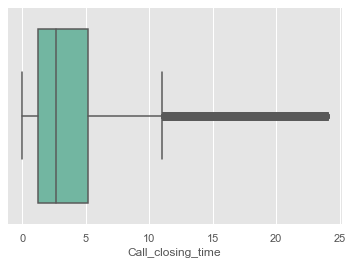

In [48]:
sns.boxplot(x=df['Call_closing_time'],palette="Set2")

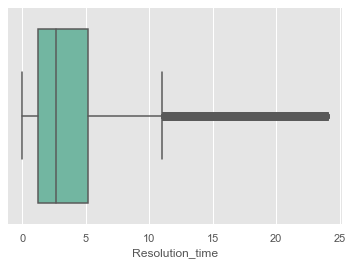

In [49]:
sns.boxplot(x=df['Resolution_time'],palette="Set2")

Call closing time and resolution time have 777 outliers.

In [50]:
#here we have some outliers in above two varibles(call closing time and resolution time) therefore we fill missing values by median and rest of thers with mean
df['Call_closing_time']=df['Call_closing_time'].fillna(df['Call_closing_time'].median())
df['Resolution_time']=df['Resolution_time'].fillna(df['Resolution_time'].median())
df["Latitude"]=df["Latitude"].fillna(df["Latitude"].median())
df["Longitude"]=df["Longitude"].fillna(df["Longitude"].median())
df["Y_Coordinate_(State_Plane)"]=df["Y_Coordinate_(State_Plane)"].fillna(df["Y_Coordinate_(State_Plane)"].median())
df["X_Coordinate_(State_Plane)"]=df["X_Coordinate_(State_Plane)"].fillna(df["X_Coordinate_(State_Plane)"].median())
df["Incident_Zip"]=df["Incident_Zip"].fillna(df["Incident_Zip"].median())

In [51]:
df.isnull().sum()

Agency_Name                   0
Complaint_Type                0
Descriptor                    0
Location_Type                 0
Incident_Zip                  0
Incident_Address              0
Street_Name                   0
Cross_Street_1                0
Cross_Street_2                0
Address_Type                  0
City                          0
Status                        0
Resolution_Description        0
Community_Board               0
Borough                       0
X_Coordinate_(State_Plane)    0
Y_Coordinate_(State_Plane)    0
Park_Borough                  0
Latitude                      0
Longitude                     0
month                         0
Call_closing_time             0
Resolution_time               0
dtype: int64

# hypothesis testing

# Chi square Test

in chi square test we are going to check is there any association between compalint_types and city/ location_type OR checking hypothesis
H0: complaint_type and city are independet
H1: complaint_type and city are not independet(dependnt)

In [52]:
from scipy.stats import chi2_contingency

In [53]:
contingency=pd.crosstab(df['Complaint_Type'],df['Location_Type'],normalize='all')     #1st create contingency table for chi square test
contingency

Location_Type                Bridge  Club/Bar/Restaurant  Commercial  \
Complaint_Type                                                         
Agency Issues              0.000000             0.000000    0.000000   
Animal Abuse               0.000000             0.000000    0.000296   
Animal in a Park           0.000000             0.000000    0.000000   
Bike/Roller/Skate Chronic  0.000000             0.000000    0.000000   
Blocked Driveway           0.000000             0.000000    0.000000   
Derelict Vehicle           0.000000             0.000000    0.000000   
Disorderly Youth           0.000000             0.000000    0.000000   
Drinking                   0.000000             0.001256    0.000000   
Ferry Complaint            0.000000             0.000000    0.000000   
Graffiti                   0.000000             0.000000    0.000000   
Homeless Encampment        0.000005             0.000000    0.000000   
Illegal Fireworks          0.000000             0.000000    0.000000   
Illegal Parking            0.000000             0.000000    0.000000   
Noise - Commercial         0.000000             0.057725    0.000000   
Noise - House of Worship   0.000000             0.000000    0.000000   
Noise - Park               0.000000             0.000000    0.000000   
Noise - Street/Sidewalk    0.000000             0.000000    0.000000   
Noise - Vehicle            0.000000             0.000000    0.000000   
Panhandling                0.000000             0.000000    0.000000   
Posting Advertisement      0.000000             0.000000    0.000000   
Squeegee                   0.000000             0.000000    0.000000   
Traffic                    0.000000             0.000000    0.000000   
Urinating in Public        0.000000             0.000069    0.000000   
Vending                    0.000000             0.000000    0.000000   

Location_Type                 Ferry   Highway  House and Store  \
Complaint_Type                                                   
Agency Issues              0.000000  0.000000         0.000000   
Animal Abuse               0.000000  0.000000         0.000672   
Animal in a Park           0.000000  0.000000         0.000000   
Bike/Roller/Skate Chronic  0.000000  0.000000         0.000000   
Blocked Driveway           0.000000  0.000000         0.000000   
Derelict Vehicle           0.000000  0.000052         0.000000   
Disorderly Youth           0.000000  0.000000         0.000000   
Drinking                   0.000000  0.000000         0.000000   
Ferry Complaint            0.000003  0.000000         0.000000   
Graffiti                   0.000000  0.000000         0.000000   
Homeless Encampment        0.000000  0.000052         0.000000   
Illegal Fireworks          0.000000  0.000000         0.000000   
Illegal Parking            0.000000  0.000000         0.000000   
Noise - Commercial         0.000000  0.000000         0.000000   
Noise - House of Worship   0.000000  0.000000         0.000000   
Noise - Park               0.000000  0.000000         0.000000   
Noise - Street/Sidewalk    0.000000  0.000000         0.000000   
Noise - Vehicle            0.000000  0.000000         0.000000   
Panhandling                0.000000  0.000000         0.000000   
Posting Advertisement      0.000000  0.000000         0.000000   
Squeegee                   0.000000  0.000000         0.000000   
Traffic                    0.000000  0.000623         0.000000   
Urinating in Public        0.000000  0.000000         0.000000   
Vending                    0.000000  0.000000         0.000000   

Location_Type              House of Worship      Park  Park/Playground  \
Complaint_Type                                                           
Agency Issues                       0.00000  0.000000         0.000000   
Animal Abuse                        0.00000  0.000000         0.000395   
Animal in a Park                    0.00000  0.000003         0.000000   
Bike/Roller/Skate Chronic           0.00

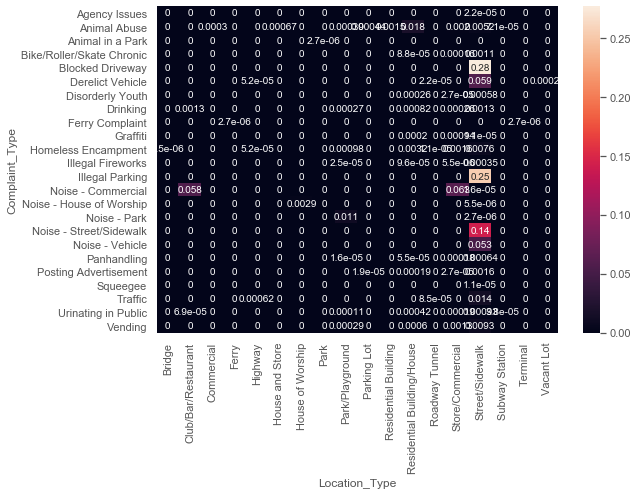

In [54]:
fig=plt.figure(figsize=(9,6))                # also we see above table using heatmap plot
sns.heatmap(contingency,annot=True)
plt.show()

In [55]:
c,p,dof,expected=chi2_contingency(contingency)
print(p)                                                                 #print p value

1.0


As p value is greater than 0.05, we fail to reject Ho hence conclude that Complaint type is independent of Location Type.

In [56]:
contingency1=pd.crosstab(df['Complaint_Type'],df['City'],normalize='all')     #1st create contingency table for chi square test
contingency1

City                        ARVERNE   ASTORIA   Astoria   BAYSIDE  BELLEROSE  \
Complaint_Type                                                                 
Agency Issues              0.000000  0.000000  0.000000  0.000000   0.000000   
Animal Abuse               0.000126  0.000466  0.000000  0.000145   0.000041   
Animal in a Park           0.000000  0.000000  0.000000  0.000000   0.000000   
Bike/Roller/Skate Chronic  0.000000  0.000044  0.000000  0.000000   0.000003   
Blocked Driveway           0.000137  0.009425  0.000436  0.001410   0.000379   
Derelict Vehicle           0.000088  0.001169  0.000038  0.000634   0.000329   
Disorderly Youth           0.000005  0.000014  0.000000  0.000005   0.000005   
Drinking                   0.000003  0.000118  0.000000  0.000003   0.000003   
Ferry Complaint            0.000000  0.000000  0.000000  0.000000   0.000000   
Graffiti                   0.000003  0.000011  0.000000  0.000008   0.000000   
Homeless Encampment        0.000011  0.000088  0.000000  0.000005   0.000003   
Illegal Fireworks          0.000000  0.000011  0.000000  0.000000   0.000003   
Illegal Parking            0.000170  0.003676  0.000760  0.001750   0.000362   
Noise - Commercial         0.000005  0.004534  0.000853  0.000129   0.000104   
Noise - House of Worship   0.000038  0.000058  0.000000  0.000008   0.000003   
Noise - Park               0.000005  0.000176  0.000000  0.000011   0.000003   
Noise - Street/Sidewalk    0.000080  0.001122  0.000398  0.000047   0.000036   
Noise - Vehicle            0.000027  0.000647  0.000000  0.000066   0.000030   
Panhandling                0.000003  0.000005  0.000000  0.000000   0.000003   
Posting Advertisement      0.000000  0.000008  0.000000  0.000000   0.000003   
Squeegee                   0.000000  0.000000  0.000000  0.000000   0.000000   
Traffic                    0.000003  0.000165  0.000000  0.000025   0.000025   
Urinating in Public        0.000003  0.000027  0.000000  0.000000   0.000003   
Vending                    0.000003  0.000156  0.000000  0.000005   0.000000   

City                       BREEZY POINT     BRONX  BROOKLYN  CAMBRIA HEIGHTS  \
Complaint_Type                                                                 
Agency Issues                  0.000000  0.000000  0.000000         0.000000   
Animal Abuse                   0.000005  0.005407  0.008753         0.000041   
Animal in a Park               0.000000  0.000000  0.000000         0.000000   
Bike/Roller/Skate Chronic      0.000000  0.000060  0.000340         0.000000   
Blocked Driveway               0.000008  0.046805  0.099976         0.000486   
Derelict Vehicle               0.000008  0.006592  0.017169         0.000406   
Disorderly Youth               0.000000  0.000181  0.000217         0.000000   
Drinking                       0.000003  0.000565  0.000798         0.000000   
Ferry Complaint                0.000000  0.000000  0.000000         0.000000   
Graffiti                       0.000000  0.000041  0.000165         0.000000   
Homeless Encampment            0.000000  0.000754  0.002600         0.000016   
Illegal Fireworks              0.000000  0.000066  0.000167         0.000003   
Illegal Parking                0.000044  0.027126  0.091983         0.000310   
Noise - Commercial             0.000011  0.008078  0.038019         0.000052   
Noise - House of Worship       0.000000  0.000247  0.001067         0.000005   
Noise - Park                   0.000000  0.001503  0.004320         0.000000   
Noise - Street/Sidewalk        0.000003  0.025088  0.038359         0.000080   
Noise - Vehicle                0.000003  0.009754  0.016365         0.000274   
Panhandling                    0.000000  0.000055  0.000134         0.000000   
Posting Advertisement          0.000000  0.000049  0.000159         0.000000   
Squeegee                       0.000000  0.000000  0.000000         0.000000   
Traffic                        0.000000  0.001171  0.003451         0.000019   

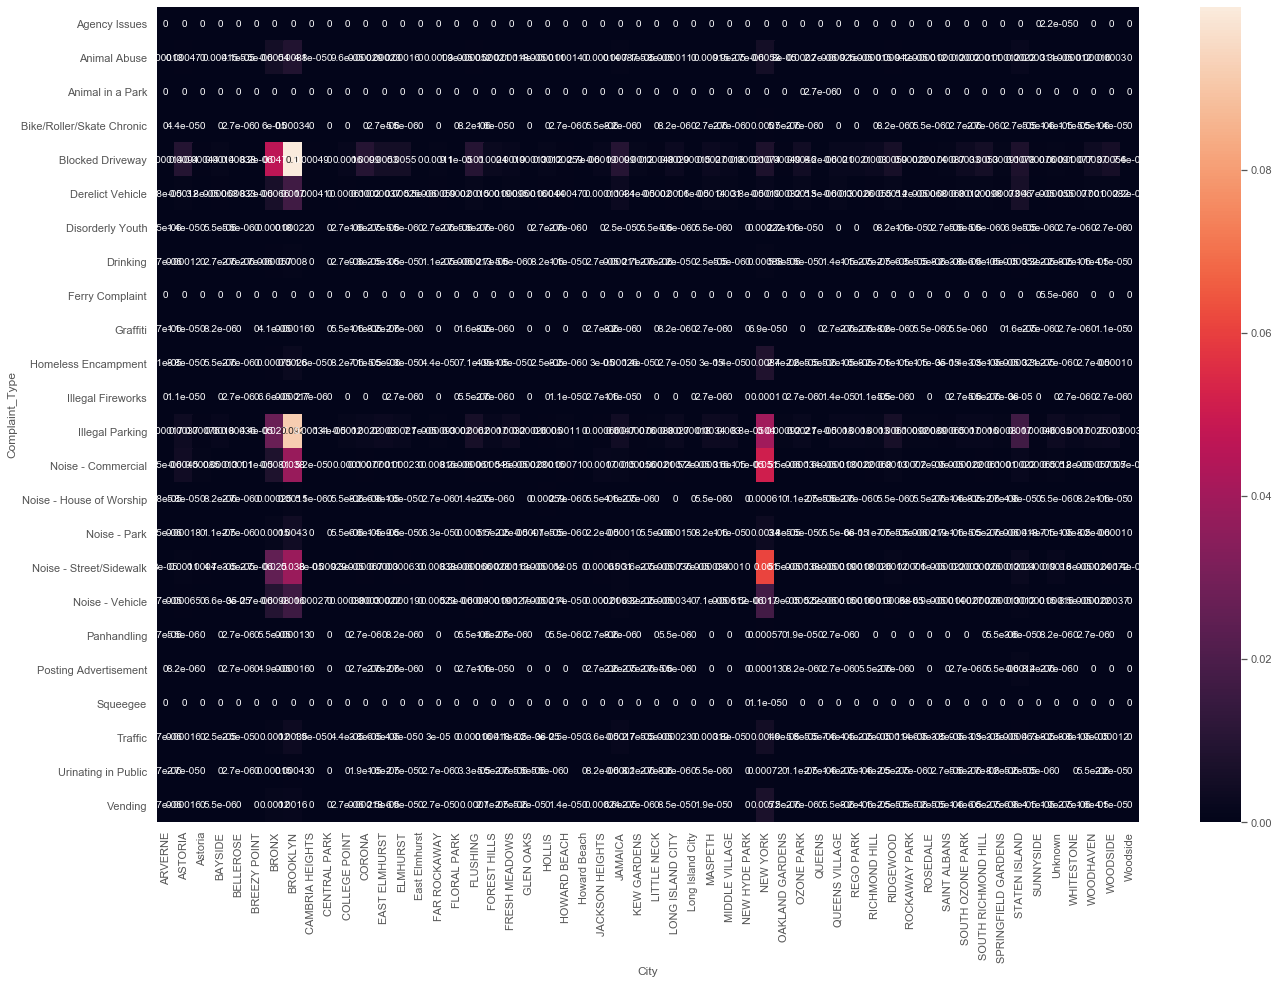

In [57]:
fig=plt.figure(figsize=(22,15))                # also we see above table using heatmap plot
sns.heatmap(contingency1,annot=True)
plt.show()

In [58]:
c,p,dof,expected=chi2_contingency(contingency1)
print(p)                                                                 

1.0


As p value is greater than 0.05, we fail to reject Ho hence conclude that Complaint type is independent of Cities.

in chi square test we are going to check is there any association between compalint_types and Agency_Name OR checking hypothesis
H0: complaint_type and Agency_Name are independet
H1: complaint_type and Agency_Name are not independet(dependnt)

In [59]:
contingency2=pd.crosstab(df['Complaint_Type'],df['Agency_Name'],normalize='all')     #1st create contingency table for chi square test
contingency2

Agency_Name                Internal Affairs Bureau      NYPD  \
Complaint_Type                                                 
Agency Issues                             0.000022  0.000000   
Animal Abuse                              0.000000  0.000000   
Animal in a Park                          0.000000  0.000000   
Bike/Roller/Skate Chronic                 0.000000  0.000000   
Blocked Driveway                          0.000000  0.000003   
Derelict Vehicle                          0.000000  0.000000   
Disorderly Youth                          0.000000  0.000000   
Drinking                                  0.000000  0.000000   
Ferry Complaint                           0.000000  0.000000   
Graffiti                                  0.000000  0.000000   
Homeless Encampment                       0.000000  0.000000   
Illegal Fireworks                         0.000000  0.000000   
Illegal Parking                           0.000000  0.000003   
Noise - Commercial                        0.000000  0.000000   
Noise - House of Worship                  0.000000  0.000000   
Noise - Park                              0.000000  0.000000   
Noise - Street/Sidewalk                   0.000000  0.000000   
Noise - Vehicle                           0.000000  0.000000   
Panhandling                               0.000000  0.000000   
Posting Advertisement                     0.000000  0.000000   
Squeegee                                  0.000000  0.000000   
Traffic                                   0.000000  0.000000   
Urinating in Public                       0.000000  0.000000   
Vending                                   0.000000  0.000000   

Agency_Name                New York City Police Department  
Complaint_Type                                              
Agency Issues                                     0.000000  
Animal Abuse                                      0.028914  
Animal in a Park                                  0.000003  
Bike/Roller/Skate Chronic                         0.001311  
Blocked Driveway                                  0.276719  
Derelict Vehicle                                  0.059417  
Disorderly Youth                                  0.000864  
Drinking                                          0.003865  
Ferry Complaint                                   0.000005  
Graffiti                                          0.000431  
Homeless Encampment                               0.013383  
Illegal Fireworks                                 0.000472  
Illegal Parking                                   0.254220  
Noise - Commercial                                0.120993  
Noise - House of Worship                          0.002935  
Noise - Park                                      0.011271  
Noise - Street/Sidewalk                           0.141794  
Noise - Vehicle                                   0.053083  
Panhandling                                       0.000897  
Posting Advertisement                             0.001868  
Squeegee                                          0.000011  
Traffic                                           0.014258  
Urinating in Public                               0.001758  
Vending                                           0.011499

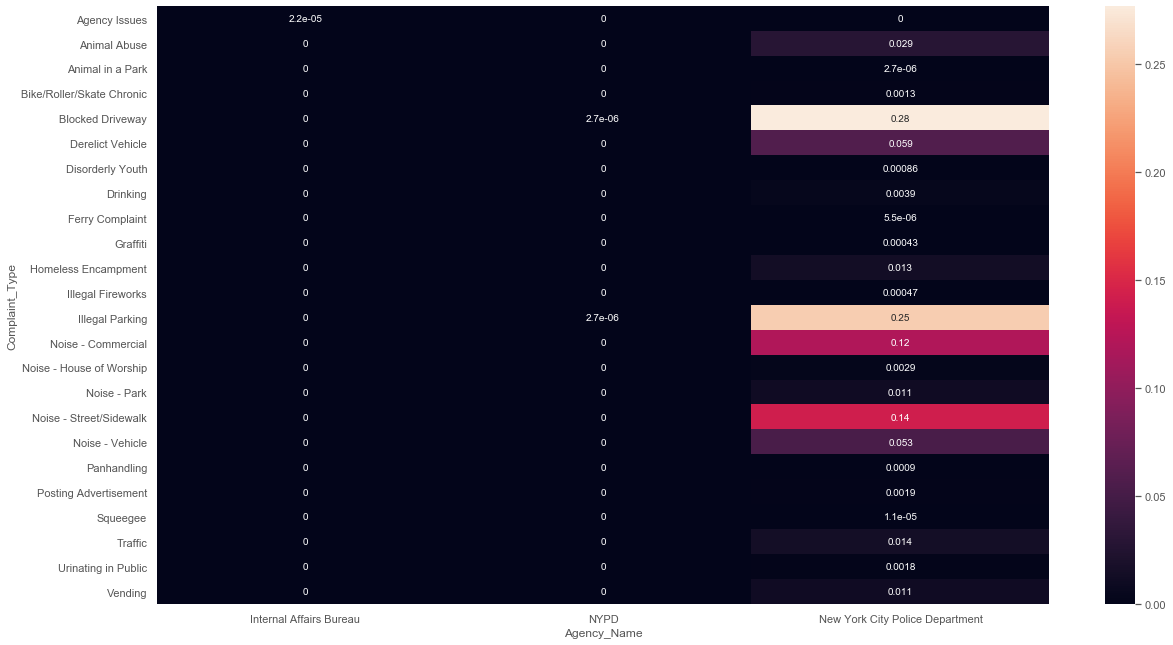

In [60]:
fig=plt.figure(figsize=(20,11))                # also we see above table using heatmap plot
sns.heatmap(contingency2,annot=True)
plt.show()

In [61]:
c,p,dof,expected=chi2_contingency(contingency2)
print(p)          

1.0


As p value is greater than 0.05, we fail to reject Ho hence conclude that Complaint type is independent of Agency_Name.

# Shapiro-Wilk Test to check normality 

In [62]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

stat, p = shapiro(df[['Resolution_time']])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.801, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\SMART\Anaconda\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Wilcoxon sign test

In [63]:
from scipy.stats import wilcoxon
z_statistic,p_value=wilcoxon(df['Resolution_time']-4,alternative="less")
print("one sample wilcoxon test",p_value, z_statistic)

one sample wilcoxon test 0.0 24753893095.0


As p value is grater than 0.05, accept Ho.The mean resolution time is less than or equal to 4 hrs.i.e.,Complaint query solved in less than or in 4 hrs.

# Creating our target variable using Resolution time feature

In [64]:
# classifying resolution_time into classes which are store into Time_bucket varible

In [65]:
df["Time_bucket"]= np.where(df["Resolution_time"]<1,0,        
                                 np.where(df["Resolution_time"]<3,1,
                                         np.where(df["Resolution_time"]<6,2,
                                                 np.where(df["Resolution_time"]<10,3,
                                                         np.where(df["Resolution_time"]<12,4,
                                                                 np.where(df["Resolution_time"]<24,5,
                                                                         np.where(df["Resolution_time"]<36,6,7))
                                                                 )))))

In [66]:
df.head()

Agency_Name           Complaint_Type  \
Unique Key                                                             
32310363    New York City Police Department  Noise - Street/Sidewalk   
32309934    New York City Police Department         Blocked Driveway   
32309159    New York City Police Department         Blocked Driveway   
32305098    New York City Police Department          Illegal Parking   
32306529    New York City Police Department          Illegal Parking   

                              Descriptor    Location_Type Incident_Zip  \
Unique Key                                                               
32310363                Loud Music/Party  Street/Sidewalk        10034   
32309934                       No Access  Street/Sidewalk        11105   
32309159                       No Access  Street/Sidewalk        10458   
32305098    Commercial Overnight Parking  Street/Sidewalk        10461   
32306529                Blocked Sidewalk  Street/Sidewalk        11373   

                 Incident_Address       Street_Name   Cross_Street_1  \
Unique Key                                                             
32310363      71 VERMILYEA AVENUE  VERMILYEA AVENUE   ACADEMY STREET   
32309934          27-07 23 AVENUE         23 AVENUE        27 STREET   
32309159    2897 VALENTINE AVENUE  VALENTINE AVENUE  EAST 198 STREET   
32305098      2940 BAISLEY AVENUE    BAISLEY AVENUE    EDISON AVENUE   
32306529            87-14 57 ROAD           57 ROAD   SEABURY STREET   

             Cross_Street_2 Address_Type      City  Status  \
Unique Key                                                   
32310363    WEST 204 STREET      ADDRESS  NEW YORK  Closed   
32309934          28 STREET      ADDRESS   ASTORIA  Closed   
32309159    EAST 199 STREET      ADDRESS     BRONX  Closed   
32305098           B STREET      ADDRESS     BRONX  Closed   
32306529      HOFFMAN DRIVE      ADDRESS  ELMHURST  Closed   

                                       Resolution_Description Community_Board  \
Unique Key                                                                      
32310363    The Police Department responded and upon arriv...    12 MANHATTAN   
32309934    The Police Department responded to the complai...       01 QUEENS   
32309159    The Police Department responded and upon arriv...        07 BRONX   
32305098    The Police Department responded to the complai...        10 BRONX   
32306529    The Police Department responded and upon arriv...       04 QUEENS   

              Borough X_Coordinate_(State_Plane) Y_Coordinate_(State_Plane)  \
Unique Key                                                                    
32310363    MANHATTAN                    1005409                     254678   
32309934       QUEENS                    1007766                     221986   
32309159        BRONX                    1015081                     256380   
32305098        BRONX                    1031740                     243899   
32306529       QUEENS                    1019123                     206375   

           Park_Borough     Latitude     Longitude  month  Call_closing_time  \
Unique Key                                                                     
32310363      MANHATTAN  40.86568154  -73.92350096     12           0.933333   
32309934         QUEENS  40.77594531  -73.91509394     12           1.450000   
32309159          BRONX  40.87032452  -73.88852464     12           4.866667   
32305098          BRONX  40.83599405   -73.8283794     12           7.766667   
32306529         QUEENS  40.73305962  -73.87416976     12           3.466667   

            Resolution_time  Time_bucket  
Unique Key                                
32310363           0.933333            0  
32309934           1.450000            1  
32309159           4.866667            2  
32305098           7.766667            3  
32306529           3.466667            2

In [67]:
df["Time_bucket"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

# Mean Encoding of nominal features

so in our data most of varibles is in categorical(nominal) form we should convert it in numerical form by mean encoding for further operations 

In [68]:
df.columns

Index(['Agency_Name', 'Complaint_Type', 'Descriptor', 'Location_Type',
       'Incident_Zip', 'Incident_Address', 'Street_Name', 'Cross_Street_1',
       'Cross_Street_2', 'Address_Type', 'City', 'Status',
       'Resolution_Description', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Borough', 'Latitude', 'Longitude', 'month', 'Call_closing_time',
       'Resolution_time', 'Time_bucket'],
      dtype='object')

In [69]:
#Counting every datapoints in complaint_Type
df.groupby(['Complaint_Type'])['Time_bucket'].count()

Complaint_Type
Agency Issues                     8
Animal Abuse                  10541
Animal in a Park                  1
Bike/Roller/Skate Chronic       478
Blocked Driveway             100881
Derelict Vehicle              21661
Disorderly Youth                315
Drinking                       1409
Ferry Complaint                   2
Graffiti                        157
Homeless Encampment            4879
Illegal Fireworks               172
Illegal Parking               92679
Noise - Commercial            44109
Noise - House of Worship       1070
Noise - Park                   4109
Noise - Street/Sidewalk       51692
Noise - Vehicle               19352
Panhandling                     327
Posting Advertisement           681
Squeegee                          4
Traffic                        5198
Urinating in Public             641
Vending                        4192
Name: Time_bucket, dtype: int64

In [70]:
df['Complaint_Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint_Type, dtype: int64

In [71]:
# groupby data with Complint_Type with their mean according to their positive target value
df.groupby(['Complaint_Type'])['Time_bucket'].mean()

Complaint_Type
Agency Issues                2.000000
Animal Abuse                 1.807608
Animal in a Park             0.000000
Bike/Roller/Skate Chronic    1.410042
Blocked Driveway             1.727639
Derelict Vehicle             2.051798
Disorderly Youth             1.406349
Drinking                     1.501774
Ferry Complaint              1.000000
Graffiti                     2.114650
Homeless Encampment          1.649928
Illegal Fireworks            1.110465
Illegal Parking              1.640328
Noise - Commercial           1.249496
Noise - House of Worship     1.257944
Noise - Park                 1.359455
Noise - Street/Sidewalk      1.331541
Noise - Vehicle              1.386368
Panhandling                  1.562691
Posting Advertisement        0.822320
Squeegee                     2.000000
Traffic                      1.290496
Urinating in Public          1.408736
Vending                      1.556775
Name: Time_bucket, dtype: float64

In [72]:
df.groupby(['Agency_Name'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Agency_Name’]
Mean_encoded_complaints = df.groupby(['Agency_Name'])['Time_bucket'].mean().to_dict()
  
df['Agency_Name'] =  df['Agency_Name'].map(Mean_encoded_complaints)
  
print(df[['Agency_Name','Time_bucket']])

            Agency_Name  Time_bucket
Unique Key                          
32310363        1.57602            0
32309934        1.57602            1
32309159        1.57602            2
32305098        1.57602            3
32306529        1.57602            2
32306554        1.57602            1
32306559        1.57602            1
32307009        1.57602            1
32308581        1.57602            3
32308391        1.57602            1
32305071        1.57602            3
32306260        1.57602            4
32306612        1.57602            1
32305074        1.57602            3
32309424        1.57602            4
32309853        1.57602            5
32305538        1.57602            2
32310273        1.57602            0
32306617        1.57602            1
32308195        1.57602            0
32310127        1.57602            2
32307994        1.57602            3
32307233        1.57602            1
32308765        1.57602            0
32308423        1.57602            5
3

In [73]:
#Finally assigning the mean value and map with df[‘Location_Type’]
Mean_encoded_complaints = df.groupby(['Location_Type'])['Time_bucket'].mean().to_dict()
  
df['Location_Type'] =  df['Location_Type'].map(Mean_encoded_complaints)
  
print(df[['Location_Type','Time_bucket']])

            Location_Type  Time_bucket
Unique Key                            
32310363         1.619927            0
32309934         1.619927            1
32309159         1.619927            2
32305098         1.619927            3
32306529         1.619927            2
32306554         1.619927            1
32306559         1.619927            1
32307009         1.619927            1
32308581         1.619927            3
32308391         1.619927            1
32305071         1.619927            3
32306260         1.619927            4
32306612         1.619927            1
32305074         1.619927            3
32309424         1.619927            4
32309853         1.619927            5
32305538         1.619927            2
32310273         1.230315            0
32306617         1.230315            1
32308195         1.619927            0
32310127         1.619927            2
32307994         1.619927            3
32307233         1.303565            1
32308765         1.619927

In [74]:
df.groupby(['Descriptor'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Descriptor’]
Mean_encoded_complaints = df.groupby(['Descriptor'])['Time_bucket'].mean().to_dict()
  
df['Descriptor'] =  df['Descriptor'].map(Mean_encoded_complaints)
  
print(df[['Descriptor','Time_bucket']])

            Descriptor  Time_bucket
Unique Key                         
32310363      1.310122            0
32309934      1.700931            1
32309159      1.700931            2
32305098      1.591652            3
32306529      1.706782            2
32306554      1.685074            1
32306559      1.617139            1
32307009      1.700931            1
32308581      1.685074            3
32308391      1.700931            1
32305071      1.700931            3
32306260      1.700931            4
32306612      1.310122            1
32305074      1.685074            3
32309424      2.051798            4
32309853      1.779898            5
32305538      1.700931            2
32310273      1.310122            0
32306617      1.310122            1
32308195      1.310122            0
32310127      1.411001            2
32307994      1.685074            3
32307233      1.310122            1
32308765      1.648152            0
32308423      1.700931            5
32308426      1.700931      

In [75]:
df.groupby(['Complaint_Type'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Complaint_Type’]
Mean_encoded_complaints = df.groupby(['Complaint_Type'])['Time_bucket'].mean().to_dict()
  
df['Complaint_Type'] =  df['Complaint_Type'].map(Mean_encoded_complaints)
  
print(df[['Complaint_Type','Time_bucket']])

            Complaint_Type  Time_bucket
Unique Key                             
32310363          1.331541            0
32309934          1.727639            1
32309159          1.727639            2
32305098          1.640328            3
32306529          1.640328            2
32306554          1.640328            1
32306559          1.640328            1
32307009          1.727639            1
32308581          1.640328            3
32308391          1.727639            1
32305071          1.727639            3
32306260          1.727639            4
32306612          1.331541            1
32305074          1.640328            3
32309424          2.051798            4
32309853          1.727639            5
32305538          1.727639            2
32310273          1.249496            0
32306617          1.249496            1
32308195          1.331541            0
32310127          1.640328            2
32307994          1.640328            3
32307233          1.249496            1


In [76]:
df.groupby(['Incident_Address'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Incident_Address’]
Mean_encoded_complaints = df.groupby(['Incident_Address'])['Time_bucket'].mean().to_dict()
  
df['Incident_Address'] =  df['Incident_Address'].map(Mean_encoded_complaints)
  
print(df[['Incident_Address','Time_bucket']])

            Incident_Address  Time_bucket
Unique Key                               
32310363            0.000000            0
32309934            1.777778            1
32309159            2.000000            2
32305098            3.000000            3
32306529            2.333333            2
32306554            1.000000            1
32306559            1.857143            1
32307009            1.000000            1
32308581            2.400000            3
32308391            1.250000            1
32305071            2.000000            3
32306260            4.000000            4
32306612            1.000000            1
32305074            1.666667            3
32309424            2.666667            4
32309853            2.750000            5
32305538            1.909091            2
32310273            0.522088            0
32306617            1.312500            1
32308195            1.333333            0
32310127            2.000000            2
32307994            3.000000      

In [77]:
df.groupby(['Street_Name'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Street_name’]
Mean_encoded_complaints = df.groupby(['Street_Name'])['Time_bucket'].mean().to_dict()
  
df['Street_Name'] =  df['Street_Name'].map(Mean_encoded_complaints)
  
print(df[['Street_Name','Time_bucket']])

            Street_Name  Time_bucket
Unique Key                          
32310363       1.898148            0
32309934       1.634551            1
32309159       1.904762            2
32305098       2.333333            3
32306529       1.664062            2
32306554       1.958730            1
32306559       1.307143            1
32307009       1.630435            1
32308581       1.540541            3
32308391       1.493724            1
32305071       1.366234            3
32306260       2.318182            4
32306612       2.388889            1
32305074       2.444444            3
32309424       1.735294            4
32309853       1.289398            5
32305538       1.509843            2
32310273       0.762406            0
32306617       1.645299            1
32308195       1.022222            0
32310127       2.335079            2
32307994       1.520170            3
32307233       1.887006            1
32308765       1.158940            0
32308423       2.000000            5
3

In [78]:
df.groupby(['Cross_Street_1'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Cross_Street_1’]
Mean_encoded_complaints = df.groupby(['Cross_Street_1'])['Time_bucket'].mean().to_dict()
  
df['Cross_Street_1'] =  df['Cross_Street_1'].map(Mean_encoded_complaints)
  
print(df[['Cross_Street_1','Time_bucket']])

            Cross_Street_1  Time_bucket
Unique Key                             
32310363          1.863924            0
32309934          1.923664            1
32309159          1.761905            2
32305098          2.367347            3
32306529          1.589286            2
32306554          1.303872            1
32306559          1.046223            1
32307009          1.535109            1
32308581          1.503667            3
32308391          1.427200            1
32305071          1.635692            3
32306260          2.081761            4
32306612          2.208054            1
32305074          1.749141            3
32309424          1.705179            4
32309853          1.644068            5
32305538          1.510204            2
32310273          1.284575            0
32306617          0.929204            1
32308195          1.273466            0
32310127          1.931507            2
32307994          1.420000            3
32307233          1.567010            1


In [79]:
df.groupby(['Cross_Street_2'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Cross_Street_2’]
Mean_encoded_complaints = df.groupby(['Cross_Street_2'])['Time_bucket'].mean().to_dict()
  
df['Cross_Street_2'] =  df['Cross_Street_2'].map(Mean_encoded_complaints)
  
print(df[['Cross_Street_2','Time_bucket']])

            Cross_Street_2  Time_bucket
Unique Key                             
32310363          1.836158            0
32309934          1.877049            1
32309159          1.626374            2
32305098          2.125000            3
32306529          1.458333            2
32306554          1.580247            1
32306559          1.220947            1
32307009          1.405284            1
32308581          1.496368            3
32308391          1.118557            1
32305071          1.666237            3
32306260          2.235849            4
32306612          1.180157            1
32305074          1.826818            3
32309424          1.528249            4
32309853          1.665254            5
32305538          1.536585            2
32310273          1.291952            0
32306617          1.924812            1
32308195          1.175298            0
32310127          1.816667            2
32307994          1.520295            3
32307233          1.492063            1


In [80]:
df.groupby(['Address_Type'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Address_Type’]
Mean_encoded_complaints = df.groupby(['Address_Type'])['Time_bucket'].mean().to_dict()
  
df['Address_Type'] = df['Address_Type'].map(Mean_encoded_complaints)
  
print(df[['Address_Type','Time_bucket']])

            Address_Type  Time_bucket
Unique Key                           
32310363        1.594443            0
32309934        1.594443            1
32309159        1.594443            2
32305098        1.594443            3
32306529        1.594443            2
32306554        1.594443            1
32306559        1.594443            1
32307009        1.594443            1
32308581        1.594443            3
32308391        1.594443            1
32305071        1.594443            3
32306260        1.594443            4
32306612        1.594443            1
32305074        1.594443            3
32309424        1.594443            4
32309853        1.594443            5
32305538        1.594443            2
32310273        1.594443            0
32306617        1.594443            1
32308195        1.594443            0
32310127        1.594443            2
32307994        1.594443            3
32307233        1.594443            1
32308765        1.594443            0
32308423    

In [81]:
df.groupby(['City'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘City’]
Mean_encoded_complaints = df.groupby(['City'])['Time_bucket'].mean().to_dict()
  
df['City'] = df['City'].map(Mean_encoded_complaints)
  
print(df[['City','Time_bucket']])

                City  Time_bucket
Unique Key                       
32310363    1.200538            0
32309934    1.772619            1
32309159    2.025727            2
32305098    2.025727            3
32306529    1.429029            2
32306554    1.550967            1
32306559    1.200538            1
32307009    2.025727            1
32308581    1.676587            3
32308391    1.550967            1
32305071    1.386515            3
32306260    2.025727            4
32306612    2.025727            1
32305074    1.550967            3
32309424    1.944129            4
32309853    1.440509            5
32305538    1.761223            2
32310273    1.550967            0
32306617    1.550967            1
32308195    1.200538            0
32310127    2.025727            2
32307994    1.944129            3
32307233    1.550967            1
32308765    1.200538            0
32308423    2.025727            5
32308426    1.734438            2
32305916    1.200538            0
32308379    1.

In [82]:
df.groupby(['Status'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Status’]
Mean_encoded_complaints = df.groupby(['Status'])['Time_bucket'].mean().to_dict()
  
df['Status'] = df['Status'].map(Mean_encoded_complaints)
  
print(df[['Status','Time_bucket']])

              Status  Time_bucket
Unique Key                       
32310363    1.579862            0
32309934    1.579862            1
32309159    1.579862            2
32305098    1.579862            3
32306529    1.579862            2
32306554    1.579862            1
32306559    1.579862            1
32307009    1.579862            1
32308581    1.579862            3
32308391    1.579862            1
32305071    1.579862            3
32306260    1.579862            4
32306612    1.579862            1
32305074    1.579862            3
32309424    1.579862            4
32309853    1.579862            5
32305538    1.579862            2
32310273    1.579862            0
32306617    1.579862            1
32308195    1.579862            0
32310127    1.579862            2
32307994    1.579862            3
32307233    1.579862            1
32308765    1.579862            0
32308423    1.579862            5
32308426    1.579862            2
32305916    1.579862            0
32308379    1.

In [83]:
df.groupby(['Resolution_Description'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Resolution_Description’]
Mean_encoded_complaints = df.groupby(['Resolution_Description'])['Time_bucket'].mean().to_dict()
  
df['Resolution_Description'] = df['Resolution_Description'].map(Mean_encoded_complaints)
  
print(df[['Resolution_Description','Time_bucket']])

            Resolution_Description  Time_bucket
Unique Key                                     
32310363                  1.860426            0
32309934                  1.746728            1
32309159                  1.860426            2
32305098                  1.410426            3
32306529                  1.860426            2
32306554                  1.860426            1
32306559                  1.277650            1
32307009                  1.746728            1
32308581                  1.340901            3
32308391                  1.860426            1
32305071                  1.860426            3
32306260                  1.746728            4
32306612                  1.746728            1
32305074                  1.340901            3
32309424                  1.340901            4
32309853                  1.860426            5
32305538                  1.277650            2
32310273                  1.410426            0
32306617                  1.410426      

In [84]:
df.groupby(['Community_Board'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Community_Board’]
Mean_encoded_complaints = df.groupby(['Community_Board'])['Time_bucket'].mean().to_dict()
  
df['Community_Board'] = df['Community_Board'].map(Mean_encoded_complaints)
  
print(df[['Community_Board','Time_bucket']])

            Community_Board  Time_bucket
Unique Key                              
32310363           1.508205            0
32309934           1.776852            1
32309159           1.699889            2
32305098           2.315405            3
32306529           1.401263            2
32306554           2.098097            1
32306559           1.508205            1
32307009           1.935484            1
32308581           1.799900            3
32308391           1.219872            1
32305071           1.424279            3
32306260           2.149194            4
32306612           2.315405            1
32305074           1.753598            3
32309424           1.830246            4
32309853           1.390381            5
32305538           1.727201            2
32310273           1.011678            0
32306617           1.754323            1
32308195           1.094757            0
32310127           2.267555            2
32307994           1.830246            3
32307233        

In [85]:
df.groupby(['Borough'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Borough’]
Mean_encoded_complaints = df.groupby(['Borough'])['Time_bucket'].mean().to_dict()
  
df['Borough'] = df['Borough'].map(Mean_encoded_complaints)
  
print(df[['Borough','Time_bucket']])

             Borough  Time_bucket
Unique Key                       
32310363    1.200847            0
32309934    1.683683            1
32309159    2.025809            2
32305098    2.025809            3
32306529    1.683683            2
32306554    1.550932            1
32306559    1.200847            1
32307009    2.025809            1
32308581    1.683683            3
32308391    1.550932            1
32305071    1.683683            3
32306260    2.025809            4
32306612    2.025809            1
32305074    1.550932            3
32309424    1.683683            4
32309853    1.683683            5
32305538    1.683683            2
32310273    1.550932            0
32306617    1.550932            1
32308195    1.200847            0
32310127    2.025809            2
32307994    1.683683            3
32307233    1.550932            1
32308765    1.200847            0
32308423    2.025809            5
32308426    1.683683            2
32305916    1.200847            0
32308379    1.

In [86]:
df.groupby(['Park_Borough'])['Time_bucket'].mean()
#Finally assigning the mean value and map with df[‘Park_Borough’]
Mean_encoded_complaints = df.groupby(['Park_Borough'])['Time_bucket'].mean().to_dict()
  
df['Park_Borough'] = df['Park_Borough'].map(Mean_encoded_complaints)
  
print(df[['Park_Borough','Time_bucket']])

            Park_Borough  Time_bucket
Unique Key                           
32310363        1.200847            0
32309934        1.683683            1
32309159        2.025809            2
32305098        2.025809            3
32306529        1.683683            2
32306554        1.550932            1
32306559        1.200847            1
32307009        2.025809            1
32308581        1.683683            3
32308391        1.550932            1
32305071        1.683683            3
32306260        2.025809            4
32306612        2.025809            1
32305074        1.550932            3
32309424        1.683683            4
32309853        1.683683            5
32305538        1.683683            2
32310273        1.550932            0
32306617        1.550932            1
32308195        1.200847            0
32310127        2.025809            2
32307994        1.683683            3
32307233        1.550932            1
32308765        1.200847            0
32308423    

In [87]:
df.head()

Agency_Name  Complaint_Type  Descriptor  Location_Type  \
Unique Key                                                           
32310363        1.57602        1.331541    1.310122       1.619927   
32309934        1.57602        1.727639    1.700931       1.619927   
32309159        1.57602        1.727639    1.700931       1.619927   
32305098        1.57602        1.640328    1.591652       1.619927   
32306529        1.57602        1.640328    1.706782       1.619927   

           Incident_Zip  Incident_Address  Street_Name  Cross_Street_1  \
Unique Key                                                               
32310363          10034          0.000000     1.898148        1.863924   
32309934          11105          1.777778     1.634551        1.923664   
32309159          10458          2.000000     1.904762        1.761905   
32305098          10461          3.000000     2.333333        2.367347   
32306529          11373          2.333333     1.664062        1.589286   

            Cross_Street_2  Address_Type      City    Status  \
Unique Key                                                     
32310363          1.836158      1.594443  1.200538  1.579862   
32309934          1.877049      1.594443  1.772619  1.579862   
32309159          1.626374      1.594443  2.025727  1.579862   
32305098          2.125000      1.594443  2.025727  1.579862   
32306529          1.458333      1.594443  1.429029  1.579862   

            Resolution_Description  Community_Board   Borough  \
Unique Key                                                      
32310363                  1.860426         1.508205  1.200847   
32309934                  1.746728         1.776852  1.683683   
32309159                  1.860426         1.699889  2.025809   
32305098                  1.410426         2.315405  2.025809   
32306529                  1.860426         1.401263  1.683683   

           X_Coordinate_(State_Plane) Y_Coordinate_(State_Plane)  \
Unique Key                                                         
32310363                      1005409                     254678   
32309934                      1007766                     221986   
32309159                      1015081                     256380   
32305098                      1031740                     243899   
32306529                      1019123                     206375   

            Park_Borough     Latitude     Longitude  month  Call_closing_time  \
Unique Key                                                                      
32310363        1.200847  40.86568154  -73.92350096     12           0.933333   
32309934        1.683683  40.77594531  -73.91509394     12           1.450000   
32309159        2.025809  40.87032452  -73.88852464     12           4.866667   
32305098        2.025809  40.83599405   -73.8283794     12           7.766667   
32306529        1.683683  40.73305962  -73.87416976     12           3.466667   

            Resolution_time  Time_bucket  
Unique Key                                
32310363           0.933333            0  
32309934           1.450000            1  
32309159           4.866667            2  
32305098           7.766667            3  
32306529           3.466667            2

In [88]:
df.columns

Index(['Agency_Name', 'Complaint_Type', 'Descriptor', 'Location_Type',
       'Incident_Zip', 'Incident_Address', 'Street_Name', 'Cross_Street_1',
       'Cross_Street_2', 'Address_Type', 'City', 'Status',
       'Resolution_Description', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Borough', 'Latitude', 'Longitude', 'month', 'Call_closing_time',
       'Resolution_time', 'Time_bucket'],
      dtype='object')

In [89]:
df.shape

(364558, 24)

# Normality Test

Text(0.5, 0.98, 'all varibles  histograms ')

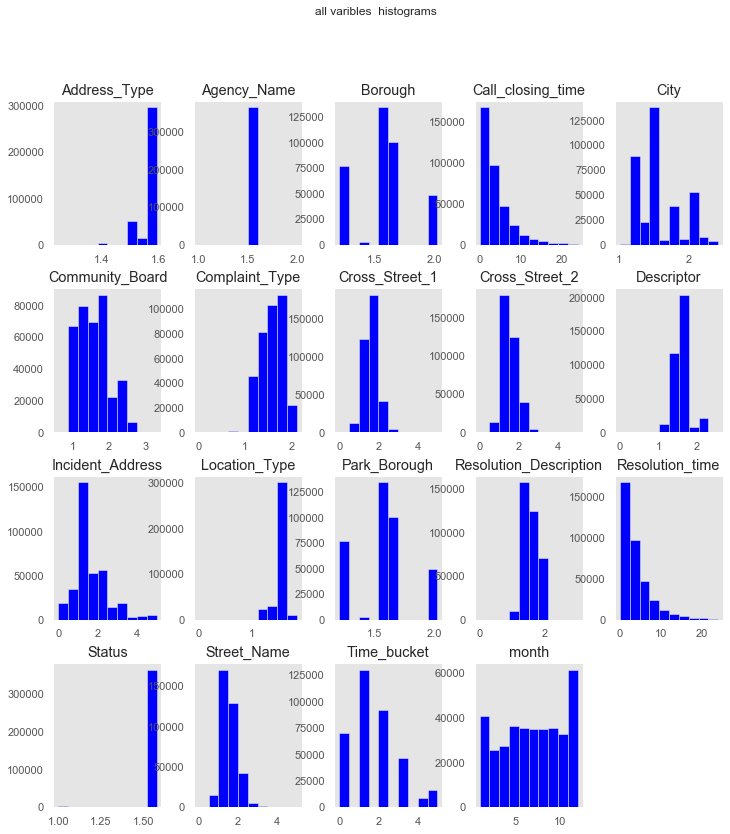

In [91]:
df.hist(layout=(4,5),color='blue',figsize=(12,13),grid=False)
plt.suptitle("all varibles  histograms ")

# PCA

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler=StandardScaler()

In [94]:
scaler.fit(df)

StandardScaler()

In [95]:
scaled_data=scaler.transform(df)

In [96]:
scaled_data

array([[-0.00255885, -1.10225133, -1.18327802, ..., -0.77336089,
        -0.77309672, -1.25024214],
       [-0.00255885,  0.68354047,  0.55582791, ..., -0.6364751 ,
        -0.6362065 , -0.45695453],
       [-0.00255885,  0.68354047,  0.55582791, ...,  0.26873738,
         0.2690353 ,  0.33633307],
       ...,
       [-0.00255885, -1.10225133, -1.18327802, ..., -0.9367407 ,
        -0.93648183, -1.25024214],
       [-0.00255885,  0.68354047,  0.55582791, ..., -0.30971547,
        -0.30943629, -0.45695453],
       [-0.00255885,  0.68354047,  0.55582791, ..., -0.28322145,
        -0.28294141, -0.45695453]])

In [97]:
df.shape

(364558, 24)

In [98]:
from sklearn.decomposition import PCA

In [99]:
pca=PCA(n_components=8)

In [100]:
pca.fit(scaled_data)

PCA(n_components=8)

In [101]:
principal_components=pca.transform(scaled_data)

In [102]:
scaled_data.shape

(364558, 24)

In [103]:
principal_components.shape

(364558, 8)

# Machine Learning

In [104]:
data_set=pd.DataFrame(principal_components)
data_set.head()

0         1         2         3         4         5         6  \
0 -2.072142 -2.096230  1.952656 -0.209719  1.733204 -0.243212 -0.852701   
1  1.317047 -1.001869 -0.641647 -0.014960  0.919059 -0.414362  0.238476   
2  3.047846 -1.812086  1.104129 -0.655617  1.046743 -1.007259  1.045371   
3  5.430543 -1.238810  1.732876  0.482042  0.916693  0.786978  0.646489   
4  0.910949  0.051465 -0.291062 -0.972998 -0.834441 -0.707981  0.102985   

          7  
0  0.440272  
1  0.003722  
2 -0.227802  
3 -0.314601  
4  0.106852

In [105]:
type(data_set)

pandas.core.frame.DataFrame

In [106]:
data_set.shape

(364558, 8)

In [107]:
data_set.isnull().sum()     #  now our data for machine learning algorithm is clean 

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

# Model Selection train test split method

In [108]:
#splitting data into dependent(y) and independent(x) varibles
x=data_set
y=df["Time_bucket"]
print(y)

Unique Key
32310363    0
32309934    1
32309159    2
32305098    3
32306529    2
32306554    1
32306559    1
32307009    1
32308581    3
32308391    1
32305071    3
32306260    4
32306612    1
32305074    3
32309424    4
32309853    5
32305538    2
32310273    0
32306617    1
32308195    0
32310127    2
32307994    3
32307233    1
32308765    0
32308423    5
32308426    2
32305916    0
32308379    2
32309402    1
32308850    1
           ..
29611177    2
29610911    2
29613202    1
29613395    0
29610186    0
29610180    2
29612845    3
29611005    0
29607433    0
29613469    1
29609131    0
29608505    1
29607742    2
29612697    1
29607990    1
29609631    1
29613295    2
29613456    0
29613402    1
29608295    0
29613386    1
29610965    1
29610950    2
29607567    0
29610051    1
29609918    4
29608392    1
29607589    0
29610889    1
29611816    1
Name: Time_bucket, Length: 364558, dtype: int32


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)
x_train,x_test,y_train,y_test

(               0         1         2         3         4          5         6  \
 172275 -4.175649 -1.658106  1.046561 -0.940214  0.605937   0.375684 -0.326759   
 111680  4.688703 -3.238165  0.622051  0.521139  2.516581   0.926215  0.126609   
 154937  1.347202 -2.996875  0.967936  0.909906  0.154940  -0.909053  0.653305   
 114627 -4.035698 -0.969743  2.080873 -1.683289 -0.014296  -0.537316 -0.082837   
 76084  -0.754648  2.749801 -0.490060 -0.046426 -0.965334   0.032174  1.710307   
 261706 -2.416823 -1.133849  2.475557 -0.699472  1.054342  -0.591629  0.124331   
 48484   0.809746 -0.460026  1.295088  2.711613 -2.098365  -0.025193 -0.403976   
 312349  1.063457 -1.630842 -1.511632 -1.059432 -0.677119  -0.218217 -1.526157   
 342361  4.449300  4.812602  2.804733 -1.350813 -1.651247   0.361264 -1.207070   
 21358  -3.324670 -0.529193  0.146208  1.986036 -2.056420   0.211995  0.698246   
 305924  1.330256  1.290674 -3.452287  0.209851  1.461747   0.051872 -1.388079   
 12478  -0.96271

In [110]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(255190, 8)
(255190,)
(109368, 8)
(109368,)


# KNN Classifier

In [111]:
knn=KNeighborsClassifier(n_neighbors=5)

In [112]:
knn.fit(x_train,y_train)                                              #fitting knn model

KNeighborsClassifier()

In [113]:
y_pred=knn.predict(x_test)                                             #predicting classes

In [114]:
type(y_pred)

numpy.ndarray

In [115]:
y_test=y_test.values

In [116]:
type(y_pred),type(y_test)

(numpy.ndarray, numpy.ndarray)

In [123]:
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)
model_accuracy=accuracy_score(y_test, y_pred)*100
print(model_accuracy)

[[19799  1187     0     0     0     0]
 [  412 38329   426     0     0     0]
 [    0   375 26957   209     0     0]
 [    0     1   347 13445   109     0]
 [    0     1     0   351  2204   179]
 [    0     0     0     6   286  4745]]
96.44411528052082


# Random forest classifier

In [124]:
rfc=RandomForestClassifier()

In [125]:
rfc.fit(x_train,y_train)                                           #fitting model

RandomForestClassifier()

In [126]:
y_pred=rfc.predict(x_test)                                       # predicting classes

In [127]:
type(y_pred),type(y_test)


(numpy.ndarray, numpy.ndarray)

In [130]:
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)
model_accuracy=accuracy_score(y_test, y_pred)
print(model_accuracy)

[[19917  1069     0     0     0     0]
 [  417 38254   496     0     0     0]
 [    0   445 26873   223     0     0]
 [    0     0   366 13455    81     0]
 [    0     0     0   346  2192   197]
 [    0     0     0     4   216  4817]]
0.9647063126325799


# Decision Tree Classifier

In [131]:
dtclf = DecisionTreeClassifier()

In [132]:
dtclf.fit(x_train,y_train) 

DecisionTreeClassifier()

In [133]:
y_pred=dtclf.predict(x_test) 

In [134]:
type(y_pred),type(y_test)

(numpy.ndarray, numpy.ndarray)

In [137]:
import numpy as np
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)
model_accuracy=accuracy_score(y_test, y_pred)
print(model_accuracy)

[[19276  1708     2     0     0     0]
 [ 1715 36327  1123     2     0     0]
 [    6  1128 25743   663     0     1]
 [    0     4   681 12862   347     8]
 [    0     0     1   397  1990   347]
 [    0     0     0    11   335  4691]]
0.922472752541877


# Linear regression

Applying regression on data with resolution_time as dependent or target varible

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)
x_train,x_test,y_train,y_test

(               0         1         2         3         4          5         6  \
 172275 -4.175649 -1.658106  1.046561 -0.940214  0.605937   0.375683 -0.326758   
 111680  4.688703 -3.238165  0.622051  0.521139  2.516581   0.926215  0.126610   
 154937  1.347202 -2.996875  0.967936  0.909906  0.154940  -0.909053  0.653306   
 114627 -4.035698 -0.969743  2.080873 -1.683289 -0.014296  -0.537316 -0.082838   
 76084  -0.754648  2.749801 -0.490060 -0.046426 -0.965334   0.032175  1.710306   
 261706 -2.416823 -1.133849  2.475557 -0.699472  1.054342  -0.591629  0.124331   
 48484   0.809746 -0.460026  1.295088  2.711613 -2.098365  -0.025192 -0.403977   
 312349  1.063457 -1.630842 -1.511632 -1.059432 -0.677119  -0.218216 -1.526159   
 342361  4.449300  4.812602  2.804733 -1.350813 -1.651247   0.361261 -1.207064   
 21358  -3.324670 -0.529193  0.146208  1.986036 -2.056421   0.211996  0.698245   
 305924  1.330256  1.290674 -3.452287  0.209851  1.461747   0.051873 -1.388080   
 12478  -0.96271

In [139]:
reg=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
reg.fit(x_train,y_train)

LinearRegression()

In [142]:
y_pred=reg.predict(x_test)

In [146]:
print('y-intercept             : ', reg.intercept_)
print('beta coefficients       : ', reg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  1.5761095540218728
beta coefficients       :  [ 0.2852884   0.41135844  0.35557942 -0.12398306 -0.18724985  0.02009957
  0.05089199 -0.0216403 ]
Mean Abs Error   MAE    :  0.26401055159084696
Mean Sq  Error MSE      :  0.1169317679562786
Root Mean Sq Error RMSE :  0.3419528738821749
r2 value                :  0.9262406664652008


# Time Series

In [17]:
from datetime import datetime

In [18]:
import plotly.graph_objs as go
import plotly.express as px

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
from statsmodels.tsa.stattools import acf,pacf

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [23]:
from statsmodels.tsa.ar_model import AR

In [24]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [25]:
from pmdarima import auto_arima

In [26]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
df=pd.read_csv("C:\\Users\\SMART\\Downloads\\Complaint_Analysis.csv")    # read the data 
df.head()

Unique Key      Created Date    Closed Date Agency  \
0    32310363  12/31/2015 23:59  1/1/2016 0:55   NYPD   
1    32309934  12/31/2015 23:59  1/1/2016 1:26   NYPD   
2    32309159  12/31/2015 23:59  1/1/2016 4:51   NYPD   
3    32305098  12/31/2015 23:57  1/1/2016 7:43   NYPD   
4    32306529  12/31/2015 23:56  1/1/2016 3:24   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0    71 VERMILYEA AVENUE  ...                 NaN                      NaN   
1        27-07 23 AVENUE  ...                 NaN                      NaN   
2  2897 VALENTINE AVENUE  ...                 NaN                      NaN   
3    2940 BAISLEY AVENUE  ...                 NaN                      NaN   
4          87-14 57 ROAD  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.865682 -73.923501   
1                 NaN  40.775945 -73.915094   
2                 NaN  40.870325 -73.888525   
3                 NaN  40.835994 -73.828379   
4                 NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 53 columns]

In [28]:
df.columns=df.columns.str.replace(' ','_')       #changes colunms name by replacing space by _
df.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

In [29]:
time_series_data=pd.DataFrame(df[["Created_Date","Complaint_Type"]])    #create dataframe for our time series analysis of complaints
time_series_data.head()

Created_Date           Complaint_Type
0  12/31/2015 23:59  Noise - Street/Sidewalk
1  12/31/2015 23:59         Blocked Driveway
2  12/31/2015 23:59         Blocked Driveway
3  12/31/2015 23:57          Illegal Parking
4  12/31/2015 23:56          Illegal Parking

In [30]:
time_series_data["Created_Date"]=pd.to_datetime(time_series_data["Created_Date"],errors='coerce').dt.date  #removing time spam from created date 

In [31]:
time_series_data["Created_Date"]=pd.to_datetime(time_series_data["Created_Date"])     # converting created date into datetime format

In [32]:
time_series_data.dtypes

Created_Date      datetime64[ns]
Complaint_Type            object
dtype: object

In [33]:
time_series_data=time_series_data.groupby(time_series_data["Created_Date"]).count()[["Complaint_Type"]]   #day wise counts of complaints

In [34]:
time_series_data.head()

Complaint_Type
Created_Date                
2015-01-01               675
2015-01-02               672
2015-01-03               691
2015-01-04               689
2015-01-05               665

In [35]:
time_series_data.tail()

Complaint_Type
Created_Date                
2015-12-27               905
2015-12-28               809
2015-12-29               830
2015-12-30               865
2015-12-31               880

In [36]:
time_series_data.isnull().sum()

Complaint_Type    0
dtype: int64

# Data Visualization of time series data

In [37]:
fig=go.Figure(data=go.Scatter(x=time_series_data.index,y=time_series_data.Complaint_Type))
fig.show()

In [38]:
fig=px.bar(time_series_data,x=time_series_data.index,y='Complaint_Type')
fig.show()

from above two graphs we see that from  april 18 2015 to december 12 2015 having more complaints

# Decomposition

<Figure size 8280x864 with 0 Axes>

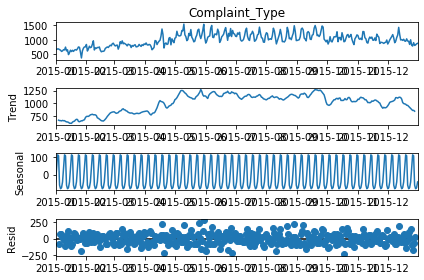

In [39]:
plt.figure(figsize=(115,12))
decomposition=seasonal_decompose(time_series_data["Complaint_Type"],model='additive')    #visualize components of time series
decomposition.plot();

here is positive trend of complaints in middel of the time period . we can also see that residual plot between -250 to 250

# Moving average

Here we calculate the  moving avre

In [40]:
time_series_data['MA30']=time_series_data['Complaint_Type'].rolling(30).mean()

In [41]:
time_series_data.head()

Complaint_Type  MA30
Created_Date                      
2015-01-01               675   NaN
2015-01-02               672   NaN
2015-01-03               691   NaN
2015-01-04               689   NaN
2015-01-05               665   NaN

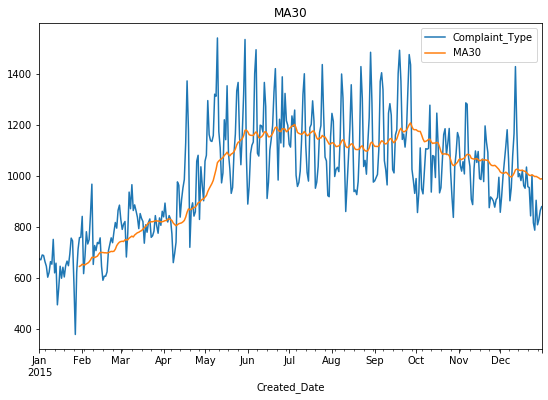

In [42]:
#visualization of MA30 
time_series_data['Complaint_Type'].plot(legend=True,title='data',figsize=(9,6)).autoscale(axis='x',tight=True)
time_series_data['MA30'].plot(legend=True,title='MA30')

# Stationarity

In [43]:
result=adfuller(time_series_data["Complaint_Type"])         # test for stationarity
result

(-2.079247645891995,
 0.2529406795763814,
 13,
 351,
 {'1%': -3.44911857009962,
  '5%': -2.8698097654570507,
  '10%': -2.5711757061225153},
 4221.601886007954)

In [44]:
if result[1]<0.05:
    print("data is stationary")
else:
    print("data is non stationary")

data is non stationary


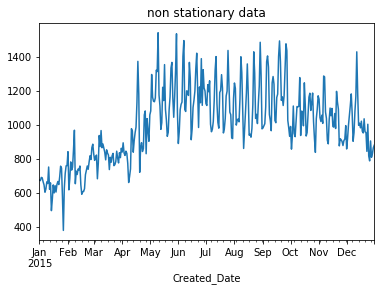

In [45]:
time_series_data["Complaint_Type"].plot(title="non stationary data").autoscale(axis='x',tight=True)

here p value is 0.25 which is greater than 0.05 so our data is stationary
so to make data stationary we should diffenentiate data

In [46]:
time_series_data["first_diff"]=time_series_data["Complaint_Type"].diff(periods=2)      
time_series_data.head()

Complaint_Type  MA30  first_diff
Created_Date                                  
2015-01-01               675   NaN         NaN
2015-01-02               672   NaN         NaN
2015-01-03               691   NaN        16.0
2015-01-04               689   NaN        17.0
2015-01-05               665   NaN       -26.0

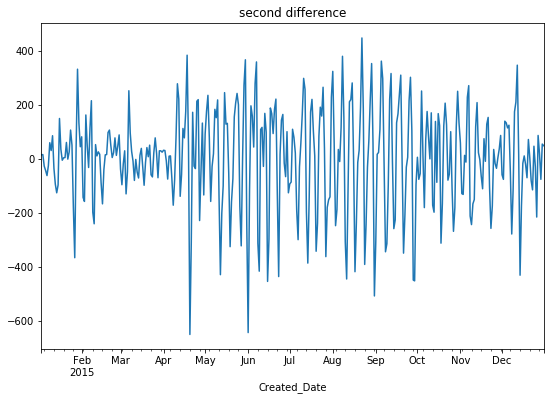

In [47]:
time_series_data["first_diff"].plot(title="second difference",figsize=(9,6)).autoscale(axis='x',tight=True);

In [48]:
result=adfuller(time_series_data["first_diff"].dropna())
result

(-7.028538607694554,
 6.272132669669265e-10,
 17,
 345,
 {'1%': -3.4494474563375737,
  '5%': -2.8699542285903887,
  '10%': -2.5712527305187987},
 4216.597883446198)

now data becomes stationary.

# Holts Winters method for Forecasting

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

here we dont split our data in train and test data we will take whole data for forecast and predict and we also use non stationary data because we are going to use holt winters method for forecasing

In [50]:
model = ExponentialSmoothing(time_series_data['Complaint_Type'],trend='multiplicative',seasonal='multiplicative',seasonal_periods=12).fit()

C:\Users\SMART\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\SMART\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\SMART\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning:

overflow encountered in matmul



# 1 week predictions

In [51]:
forecast_predictions=model.forecast(7)                                          #we are forecasting complaints of 1 week of 2016
forecast_predictions

2016-01-01    874.501394
2016-01-02    859.332764
2016-01-03    887.109923
2016-01-04    890.010768
2016-01-05    958.848532
2016-01-06    876.827348
2016-01-07    911.647882
Freq: D, dtype: float64

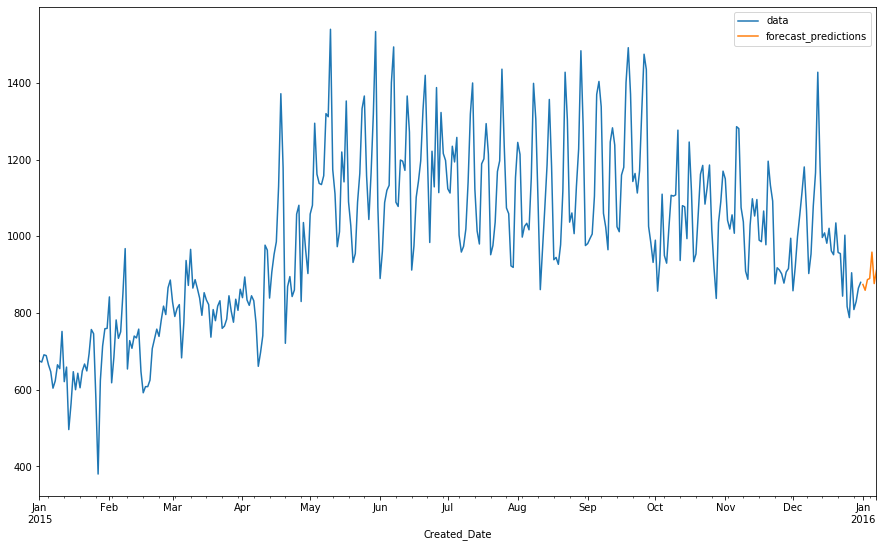

In [52]:
time_series_data["Complaint_Type"].plot(legend=True,label="data",figsize=(15,9))
forecast_predictions.plot(legend=True,label="forecast_predictions")

from the above graph we can see that the forecast preiction complaint values are less in starting of the 1st month and from last week complaints are gradually increases

# ACF and PACF

In [53]:
acf(time_series_data["first_diff"].dropna())

C:\Users\SMART\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

C:\Users\SMART\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



array([ 1.        ,  0.37355234, -0.35663339, -0.44400789, -0.35404405,
       -0.1710936 ,  0.22445222,  0.53692628,  0.26344732, -0.1957769 ,
       -0.39717068, -0.36193682, -0.11586218,  0.26338344,  0.50049745,
        0.28242962, -0.16676349, -0.40069376, -0.35978352, -0.11146842,
        0.27244173,  0.48188008,  0.26604024, -0.12523668, -0.35774322,
       -0.39573618, -0.14341192,  0.30575087,  0.47562374,  0.23072127,
       -0.14150041, -0.37570985, -0.35621827, -0.10916347,  0.26993248,
        0.47695345,  0.24274624, -0.15280843, -0.36048838, -0.34191057,
       -0.12043125])

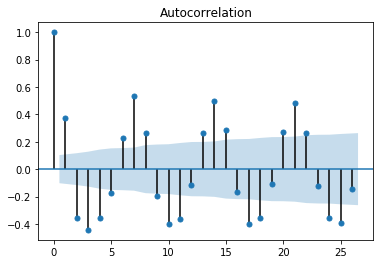

In [54]:
plot_acf(time_series_data["first_diff"].dropna());

In [55]:
pacf(time_series_data["first_diff"].dropna())

C:\Users\SMART\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1029: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

C:\Users\SMART\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



array([ 1.00000000e+00,  3.74584248e-01, -5.80353969e-01, -3.16215890e-02,
       -5.10451502e-01, -1.63454984e-01, -2.98495693e-02,  2.50965969e-01,
       -1.67117190e-01,  1.04220484e-01, -3.02570393e-01, -7.70191319e-02,
       -2.43207579e-01,  9.59245293e-02, -3.79715018e-03,  1.07809702e-01,
       -1.33265779e-01,  3.40678669e-02, -2.61808298e-01,  1.21373064e-02,
       -7.94769450e-02,  1.35080829e-01, -7.47752799e-02,  2.11303816e-01,
       -1.78498380e-01, -9.24104278e-03, -1.32529824e-01,  1.91735675e-01,
       -1.60846223e-01,  3.14593389e-01, -3.61238717e-01,  4.76731727e-01,
       -9.54904316e-01,  1.86342773e+01,  1.05729124e+00, -4.35715276e-01,
        3.46299786e-01, -2.11038416e-01,  2.31273945e-01, -2.40171681e-01,
        1.24126450e-01])

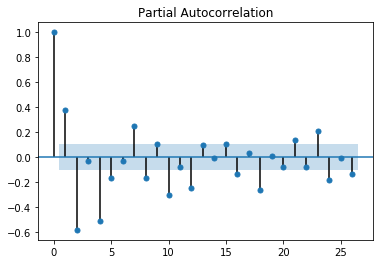

In [56]:
plot_pacf(time_series_data["first_diff"].dropna());

# Auto ARIMA and SERIMAX

In [57]:
auto_arima(time_series_data["first_diff"].dropna(),seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  363
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood               -2285.848
Date:                             Sat, 05 Jun 2021   AIC                           4581.696
Time:                                     00:59:26   BIC                           4601.168
Sample:                                          0   HQIC                          4589.436
                                             - 363                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0022      0.045     22.075      0.000       0.913       1.091
ar.L2         -0.6778      0.037    -18.099      0.000      -0.751      -0.604
ma.L1         -0.7230      0.043    -16.935      0.000      -0.807      -0.639
ar.S.L12      -0.1031      0.054     -1.906      0.057      -0.209       0.003
sigma2      1.719e+04   1225.977     14.018      0.000    1.48e+04    1.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.64   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.10   Prob(JB):                         0.42
Heteroskedasticity (H):               1.29   Skew:                            -0.11
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

from summary we get SERIMAX(2,0,1) model where p&q values are 2 and 1 .d value is 0 because our data is already differentiate at 1 so , and seasonal order is(1, 0, [], 12) SERIMAX mode

splitting data into train data and test data for analysis

In [58]:
len(time_series_data['Complaint_Type'])

365

In [59]:
train_data=time_series_data['first_diff'].iloc[:335]
test_data=time_series_data['first_diff'].iloc[335:]

In [60]:
test_data

Created_Date
2015-12-02    -75.0
2015-12-03    141.0
2015-12-04    135.0
2015-12-05    116.0
2015-12-06    126.0
2015-12-07    -48.0
2015-12-08   -278.0
2015-12-09   -113.0
2015-12-10    176.0
2015-12-11    212.0
2015-12-12    349.0
2015-12-13     18.0
2015-12-14   -431.0
2015-12-15   -175.0
2015-12-16    -15.0
2015-12-17     12.0
2015-12-18    -20.0
2015-12-19    -69.0
2015-12-20     73.0
2015-12-21      6.0
2015-12-22    -80.0
2015-12-23   -114.0
2015-12-24     48.0
2015-12-25    -27.0
2015-12-26   -215.0
2015-12-27     88.0
2015-12-28     21.0
2015-12-29    -75.0
2015-12-30     56.0
2015-12-31     50.0
Name: first_diff, dtype: float64

In [61]:
model=SARIMAX(train_data,order=(2,0,1),seasonal_order=(1,0,[],12))

C:\Users\SMART\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\SMART\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [62]:
fit_model=model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          first_diff   No. Observations:                  335
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood               -2097.914
Date:                             Sat, 05 Jun 2021   AIC                           4205.829
Time:                                     00:59:28   BIC                           4224.899
Sample:                                 01-01-2015   HQIC                          4213.431
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0137      0.046     22.244      0.000       0.924       1.103
ar.L2         -0.6827      0.039    -17.522      0.000      -0.759      -0.606
ma.L1         -0.7455      0.041    -18.371      0.000      -0.825      -0.666
ar.S.L12      -0.1165      0.056     -2.068      0.039      -0.227      -0.006
sigma2      1.727e+04   1268.484     13.618      0.000    1.48e+04    1.98e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.77   Jarque-Bera (JB):                 2.47
Prob(Q):                              0.10   Prob(JB):                         0.29
Heteroskedasticity (H):               1.59   Skew:                            -0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 1 month predictions

In [63]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions=fit_model.predict(start=start,end=end,dynamic=False,typ='levels').rename('SARIMAX(2,0,1)&(1, 0, [], 12) preictions')

In [64]:
#compare predictions v/s expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data[i]}")

predicted=-55.77655132, expected=-75.0
predicted=-19.01415068, expected=141.0
predicted=38.88514011, expected=135.0
predicted=57.73012911, expected=116.0
predicted=30.16688619, expected=126.0
predicted=-13.1341194, expected=-48.0
predicted=-13.95469537, expected=-278.0
predicted=-5.971428668, expected=-113.0
predicted=0.1480905767, expected=176.0
predicted=3.09443151 , expected=212.0
predicted=-3.126107364, expected=349.0
predicted=8.845844343, expected=18.0
predicted=3.750678229, expected=-431.0
predicted=-1.995888976, expected=-175.0
predicted=-6.923389749, expected=-15.0
predicted=-6.276825275, expected=12.0
predicted=-1.425676324, expected=-20.0
predicted=3.341209017, expected=-69.0
predicted=2.035674866, expected=73.0
predicted=-0.1251663318, expected=6.0
predicted=-1.129228621, expected=-80.0
predicted=-0.9273573518, expected=-114.0
predicted=0.5486950335, expected=48.0
predicted=-0.4565147009, expected=-27.0
predicted=0.01899032994, expected=-215.0
predicted=0.3028385758, expect

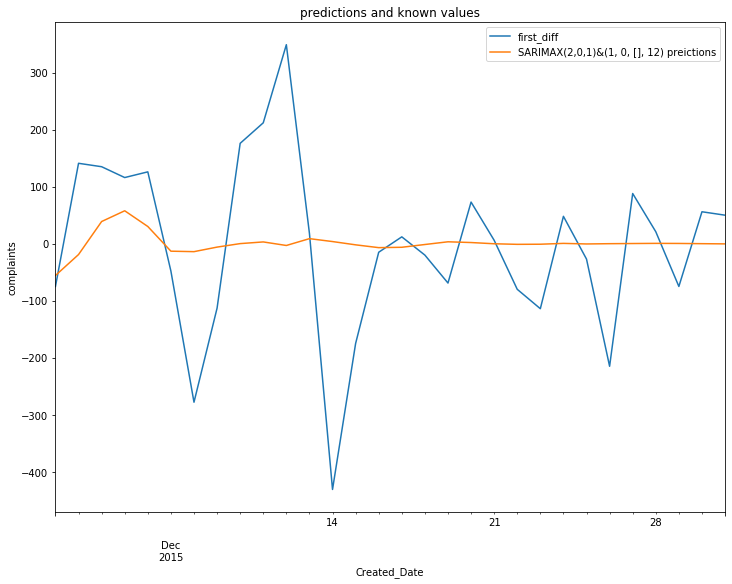

In [65]:
plt.title("predictions and known values")
plt.xlabel("time period")
plt.ylabel("complaints")
ax=test_data.plot(legend=True,figsize=(12,9))
predictions.plot(legend=True)
plt.show()

# Evaluation of the model

In [66]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test_data, predictions)
print('MSE error',error)

MSE error 21549.10712761332


In [67]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_data, predictions)
print(f'SARIMAX(4,1,3)&(1, 0, [], 12) preictions RMSE Error: {error:11.10}')

SARIMAX(4,1,3)&(1, 0, [], 12) preictions RMSE Error: 146.7961414


#  thank you